You are welcomed to write your solution to the paper exercises here as well, so that they would be exported into the same PDF file. As a reminder, the text cells support Markdown, so it's easy to write TeX style equations, such as $f(x) = x^2$, here. 


# Data Preparation

Step 0: copy this Jupyter notebook to your own Google Drive so that you can edit it. 

Step 1: copy (i.e., add a shortcut of) hw1.zip from my Google Drive to yours, preferably to the folder TTIC31220-Winter21/ under the root of your Google Drive, which you should have done in Homework 1. 

Step 2: copy (i.e., create a shortcut of) the hw3/ folder from my Google Drive to yours, similarly as Step 1. 

Step 3: run the cell below to prepare data for your experiments. Note: once you close this page or the page says "disconnected", you will probably need to rerun the cell again, but you definitely don't need to rerun all probably time-consuming experiments.

In [1]:
from google.colab import files, drive
drive.mount('/content/drive')# follow the prompt to mount your Google Drive
! cp drive/MyDrive/TTIC31220-Winter21/hw1.zip ./hw1.zip
# Note: you might need to change the above path if hw1.zip is in a different 
#   folder in your Google drive. As a hint, your Google drive root folder is 
#   /content/drive/ or ./drive 
! unzip hw1.zip 
! cp drive/MyDrive/TTIC31220-Winter21/hw3/*.py ./
! ln -s /content/drive/MyDrive/TTIC31220-Winter21/hw3/Wiki/ ./data/Wiki

Mounted at /content/drive
Archive:  hw1.zip
   creating: data/
  inflating: data/noisy_two_view_distribute.mat  
  inflating: data/idx.mat            
  inflating: data/noisy_distribute.mat  
  inflating: data/original_distribute.mat  
  inflating: dataset.py              
  inflating: plot.py                 
  inflating: svm.py                  
  inflating: utils.py                


In [2]:
%matplotlib inline
import utils
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from numpy.random import permutation as rpm
from plot import plot_images, plot_dendrogram, plot_confusion_matrix
from dataset import read_mnist, read_mnist_twoview
from utils import resize, sample_index, gen_solution, get_purity, get_nmi

In [3]:
from sklearn.cluster import SpectralClustering

In [24]:
def kmeans_cluster(features, n_clusters, n_rounds=5, maxrun=300):
    """
    k-means clustering
    ------
    Input 
      features: 2d array of shape (n_data, n_dim), data to cluster
      n_clusters: int, number of clusters
      n_rounds: int, number of time the k-means algorithm will be run with 
                different centroid seeds (default:5)
      maxrun: int, maximum iterations of the k-means for a single run 
                (default: 300)
    Output
      labels: 1d array of shape (n_data,), index of the cluster each data 
                point belongs to
    """
    print("Using K-means!")
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_rounds, max_iter=maxrun)
    kmeans.fit(features)
    labels = kmeans.predict(features)
    return labels


def hierarchical_cluster(features, n_clusters, method, metric='euclidean'):
    """
    Agglomerative (Hierarchical) clustering
    ------
    Input
      features: 2d array of shape (n_data, n_dim), data to cluster
      method: string, methods to compute distances between clusters
              Options: "single"|"complete"|"average"|"weighted"|"centroid"
                        |"median"|"ward"
      metric: string, distance metric to use (default: "euclidean")
              See the "scipy.spatial.distance.pdist" for a list of valid 
              distance metrics 
    Output
      Z: 2d array of shape (4, n_data-1), linkage matrix
      labels: 1d array of shape (n_data,), index of the cluster each data 
              point belongs to
    """
    print("Using hierarchical clustering!")
    vdist = pdist(features, metric=metric)
    Z = linkage(vdist, method=method, metric=metric)
    labels = utils.linkage_to_pred(Z, n_clusters)
    return Z, labels


def my_cluster(features, n_clusters, affinity='rbf'):
    """
    Implementation of your own Clustering method
    Feel free to change input/output of this function, depending on the method 
      you choose
    ------
    Input
      features: 2d array of shape (n_data, n_dim), data to cluster
      n_clusters: int, number of clusters
    Output
      labels: 1d array of shape (n_data,), index of the cluster each data 
      point belongs to
    """
    # TODO (optionally for 3.2/4.2, add your code below): implement your own 
    #     clustering method
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf').fit(features)
    labels = clustering.labels_
    # TODO (add your code above)
    return labels

# Part 1: Document Clustering

## Anwsers to 3.1 

**k-means:** 

*Input:* 2d array of shape (n_data, n_dim)

*Output:* labels (n_data)

*Parameters:*
1. Number of clusters: Specify how many clusters, or how many different labels would be assigned for the data
2. Stopping criterion: Reach to maximum iteration or No change in assignment

*Algorithm:*

*k* as number of clusters.
1. Randomly initialize k means as the cluster center: $\mu_1, \mu_2, ... \mu_k$
2. Assign each example to the closest means by calculating euclidean distance: $y_i = argmin_c ||x_i - \mu_c||$
3. Reestiamte cluster mean: $\mu_c = 1/N_c * \sum_{y_i = c} xi $ where $N_c = |x_i: y_i = c|$
4.Repeat step 2 and step 3 until reach stopping criterion

**Agglomerative Clustering:**
*Input:* 2d array of shape (n_data, n_dim)

*Output:* labels (n_data)

*Parameters:*
1. Number of clusters: Specify how many clusters, or how many different labels would be assigned for the data
2. Linkage methods to calculate difference between clusters: There are different methods to calculate difference between clusters such as single,complete,average,ward. Single linkage refers as the minimum distance between two clusters datapoints, complete linkage refers as the maximum distance between two clusters datapoints, aveage linkage refers as the distance between two clusters means etc.
3. metric methods to calculate the difference between clusters: It could be euclidean distance or Hamming distance or other metrics that could denote the differences between clusters

*Algorithm:*

*k* as number of clusters.
1. Initiate as every datapoints is a cluster
2. Merge two clusters with the minimum distance between two clusters calculated with specification of linkage methods and metric methods
3. Stop until number of clusters achieved. 

**Spectral Clustering:**
*Input:* 2d array of shape (n_data, n_dim)

*Output:* labels (n_data)

*Parameters:*
1. Number of clusters: Specify how many clusters, or how many different labels would be assigned for the data
2. Graph structure: The graph can be fully connected, or edges existed as the distance smaller than a cutoff or edges only existed between k nearest neighbors.
3. metric to calculate the affinity between datapoint: default as 'rbf' as use rbf kernels to calculate the affinity between two datapoints. Other options to calculate the adjacency matrix such as based on eulidean distance etc are also possible.

*Algorithm:*

*k* as number of clusters.
1. Build a graph out of datapoints and determine a graph structure: There are different graph structures that can be built from the data points. A fully connected graphs suggested all the datapoints are connected where nearest neighbors structures only have edges between closest neighbors etc.
2. Build the adjacency matrix to represent graph based on graph structure and metrics. Affinity parameter in the implementation equals 'rbf'indicates a fully connected graph with the edge weights as the rbf kernels value. If affinity parameter equals "nearest neighbors" suggesting the graph structure has edges between k nearest neighbors and the edge weights based on the distance between datapoints.
3. Build the graph laplacian matrix. Let W be the adjacency matrix (weight matrix), D as diagonal matrix $D_{ii} = \sum_j W_{i,j}$, laplacian matrix L equals $L=I-D^{1/2}*W*D^{1/2}$
4. Eigendecomposition of laplacian matrix
5. Second eigenvectors as the solution for a 2 cluster algorithm
5. Repeat step 1-5 on the newly clustered dataset until it reaches the designated numbers of clusters 

Feature path is: ./data/Wiki/tfidf/tfidf.npy
Categories: ['social_politics_culture', 'science_math_number', 'social_psychology_congnitive', 'science_cs_ml', 'science_cs_pl', 'science_math_algebra', 'science_physics_mechanics', 'social_politics_theory', 'science_cs_os', 'science_physics_thermodynamics', 'science_physics_elemag', 'social_econ_macroecon', 'social_psychology_behavior', 'science_math_geometry', 'social_econ_microecon', 'social_psychology_socialpyschology']
Using hierarchical clustering!
Ward, NMI: 0.608, Purity: 0.500


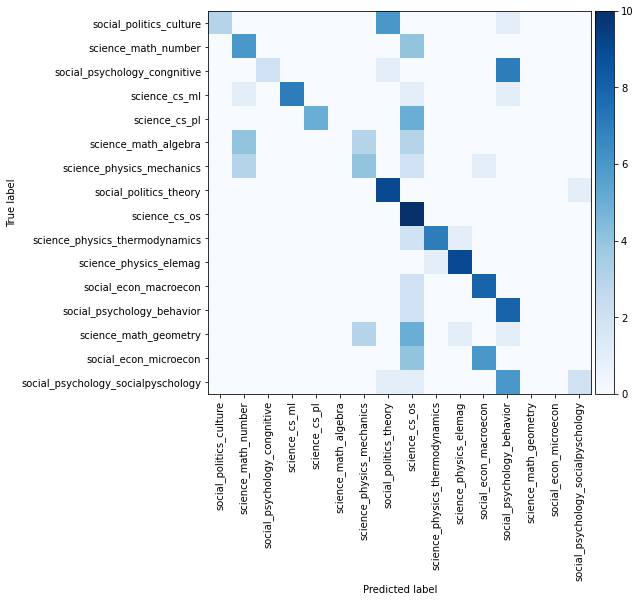

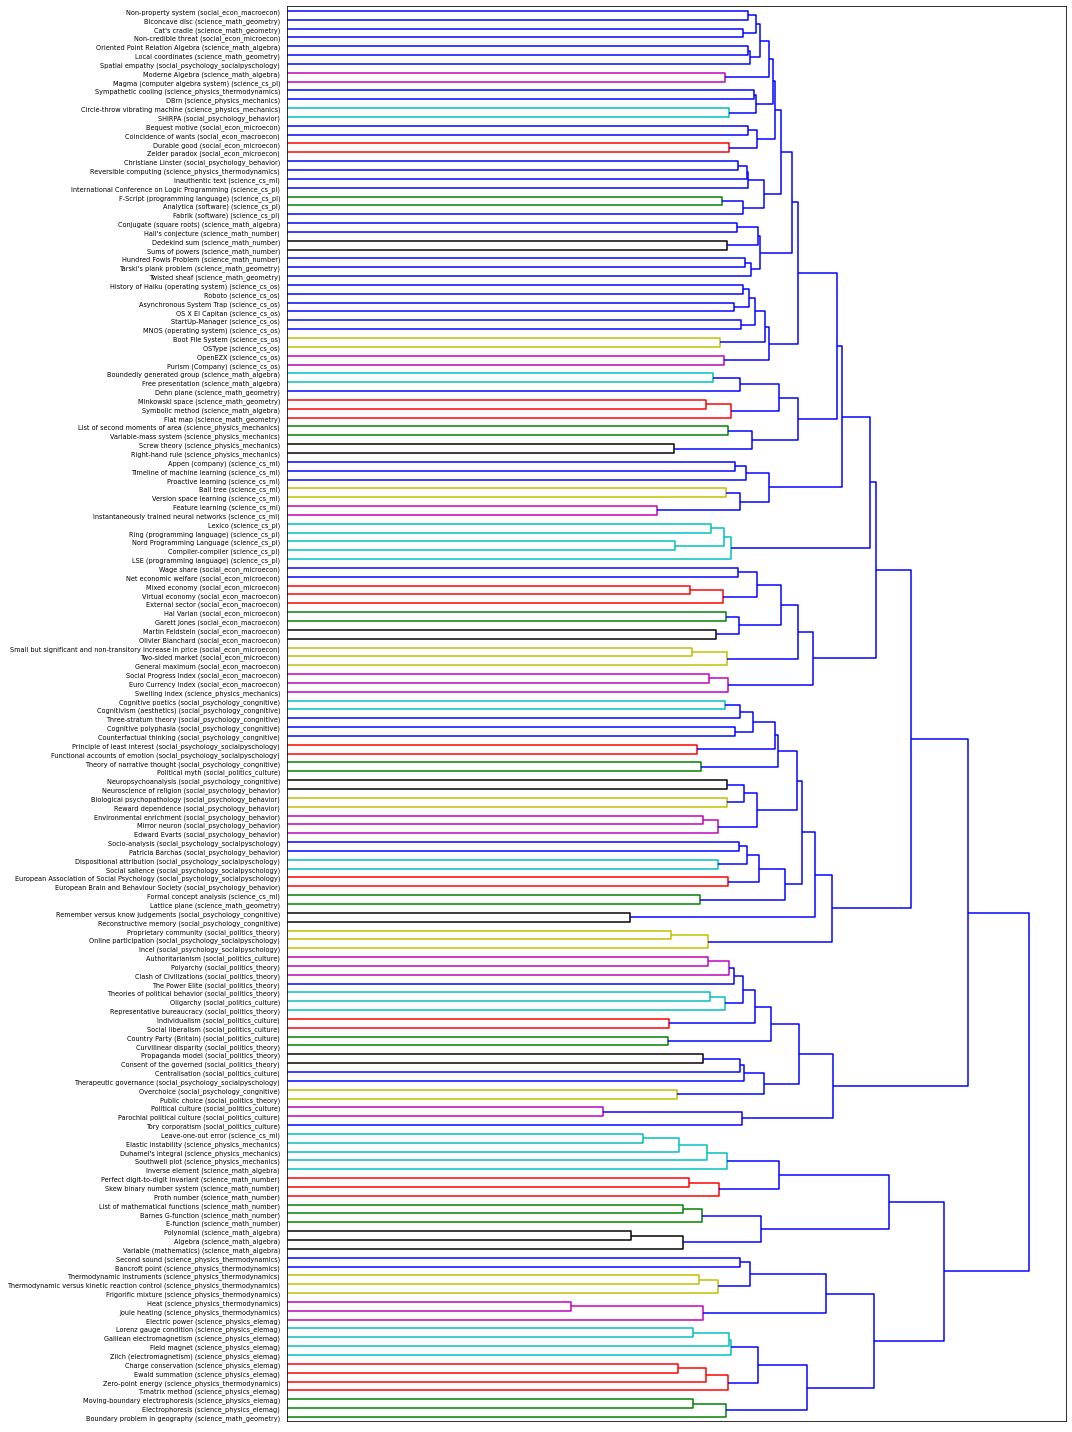

In [5]:
np.random.seed(1)
feature_path = "./data/Wiki/tfidf/tfidf.npy"
label_path = "./data/Wiki/tfidf/label.csv"

print("Feature path is: %s" % feature_path)

"""
1. Pre-define number of clusters (some hints for part of 3.4 :)
n_level = 1, 2 clusters: {'social', 'science'}
n_level = 2, 6 clusters: {'social_politics', 'science_math',..., 'social_econ'}
n_level = 3, 16 clusters: {'social_politics_culture', 'science_math_number',... 
                           'social_psychology_socialpyschology'}
"""
n_level = 3
labels, titles, cats = utils.get_label(label_path, n_level)
print("Categories: {}".format(cats))

"""
2. Hierarchical clustering
"""
fs = np.load(feature_path, allow_pickle=True)[()]
linkage_matrix, pred = hierarchical_cluster(
    fs.toarray(), n_clusters=len(cats), method='ward', metric='cosine'
)
_, cm, purity = get_purity(pred, labels)
nmi = get_nmi(pred, labels)
plot_confusion_matrix(
    cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
)
print("Ward, NMI: %.3f, Purity: %.3f" % (nmi, purity))
plot_dendrogram(
    linkage_matrix, titles, orientation='right', figsize=(15, 20), rotation=0
)


Using K-means!
K-means, NMI: 0.514, Purity: 0.425


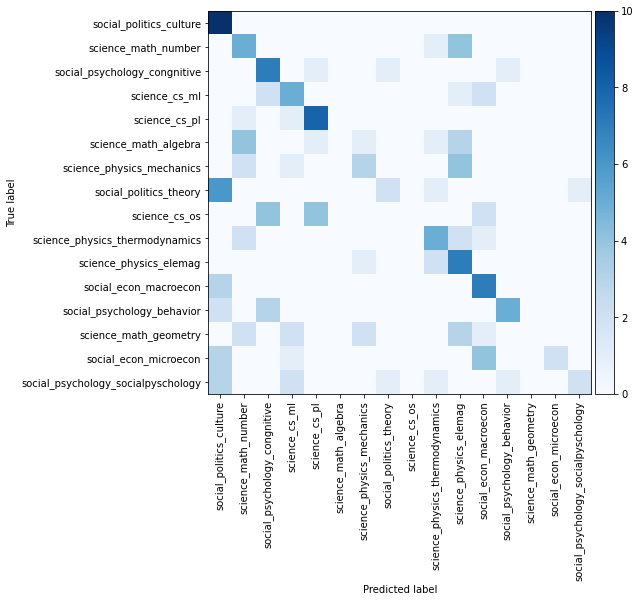

In [6]:
"""
3. Flat clustering
"""
pred = kmeans_cluster(fs, len(cats), n_rounds=5, maxrun=300)
_, cm, purity = get_purity(pred, labels)
nmi = get_nmi(pred, labels)
plot_confusion_matrix(
    cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
)
print("K-means, NMI: %.3f, Purity: %.3f" % (nmi, purity))
plt.show()

##Anwsers to 3.2
Tunning Hyperparameters

Categories: ['social_politics_culture', 'science_math_number', 'social_psychology_congnitive', 'science_cs_ml', 'science_cs_pl', 'science_math_algebra', 'science_physics_mechanics', 'social_politics_theory', 'science_cs_os', 'science_physics_thermodynamics', 'science_physics_elemag', 'social_econ_macroecon', 'social_psychology_behavior', 'science_math_geometry', 'social_econ_microecon', 'social_psychology_socialpyschology']
Using hierarchical clustering!
single, NMI: 0.1711178915317927, Purity: 0.1625
Using hierarchical clustering!
complete, NMI: 0.6471304089422751, Purity: 0.55625
Using hierarchical clustering!
average, NMI: 0.5748654981208264, Purity: 0.3625
Using hierarchical clustering!
median, NMI: 0.1613998555209228, Purity: 0.15625
Using hierarchical clustering!
ward, NMI: 0.5877446061984806, Purity: 0.48125


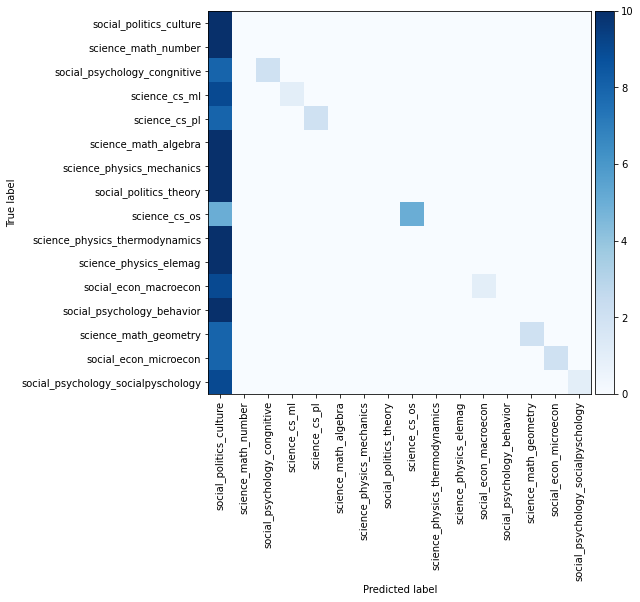

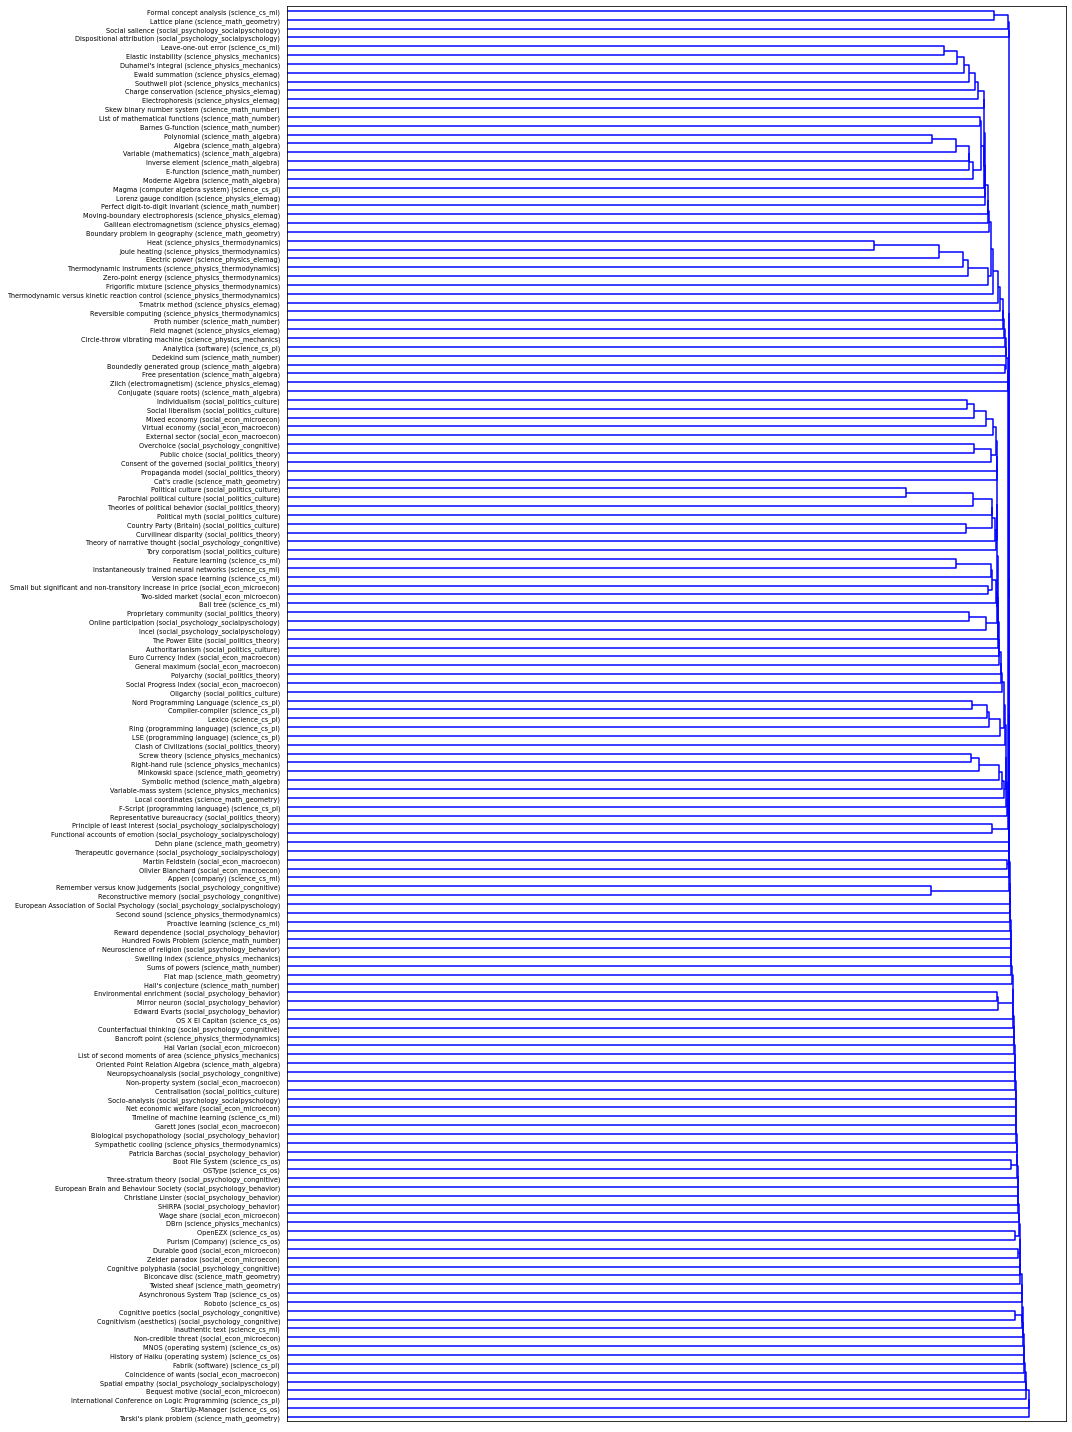

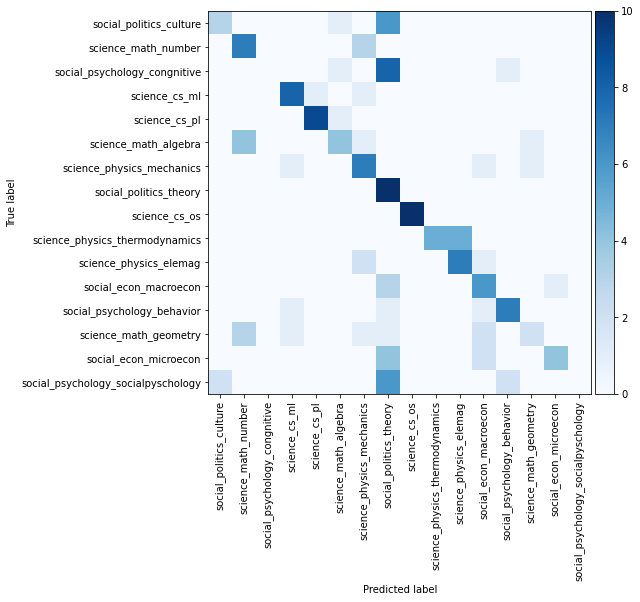

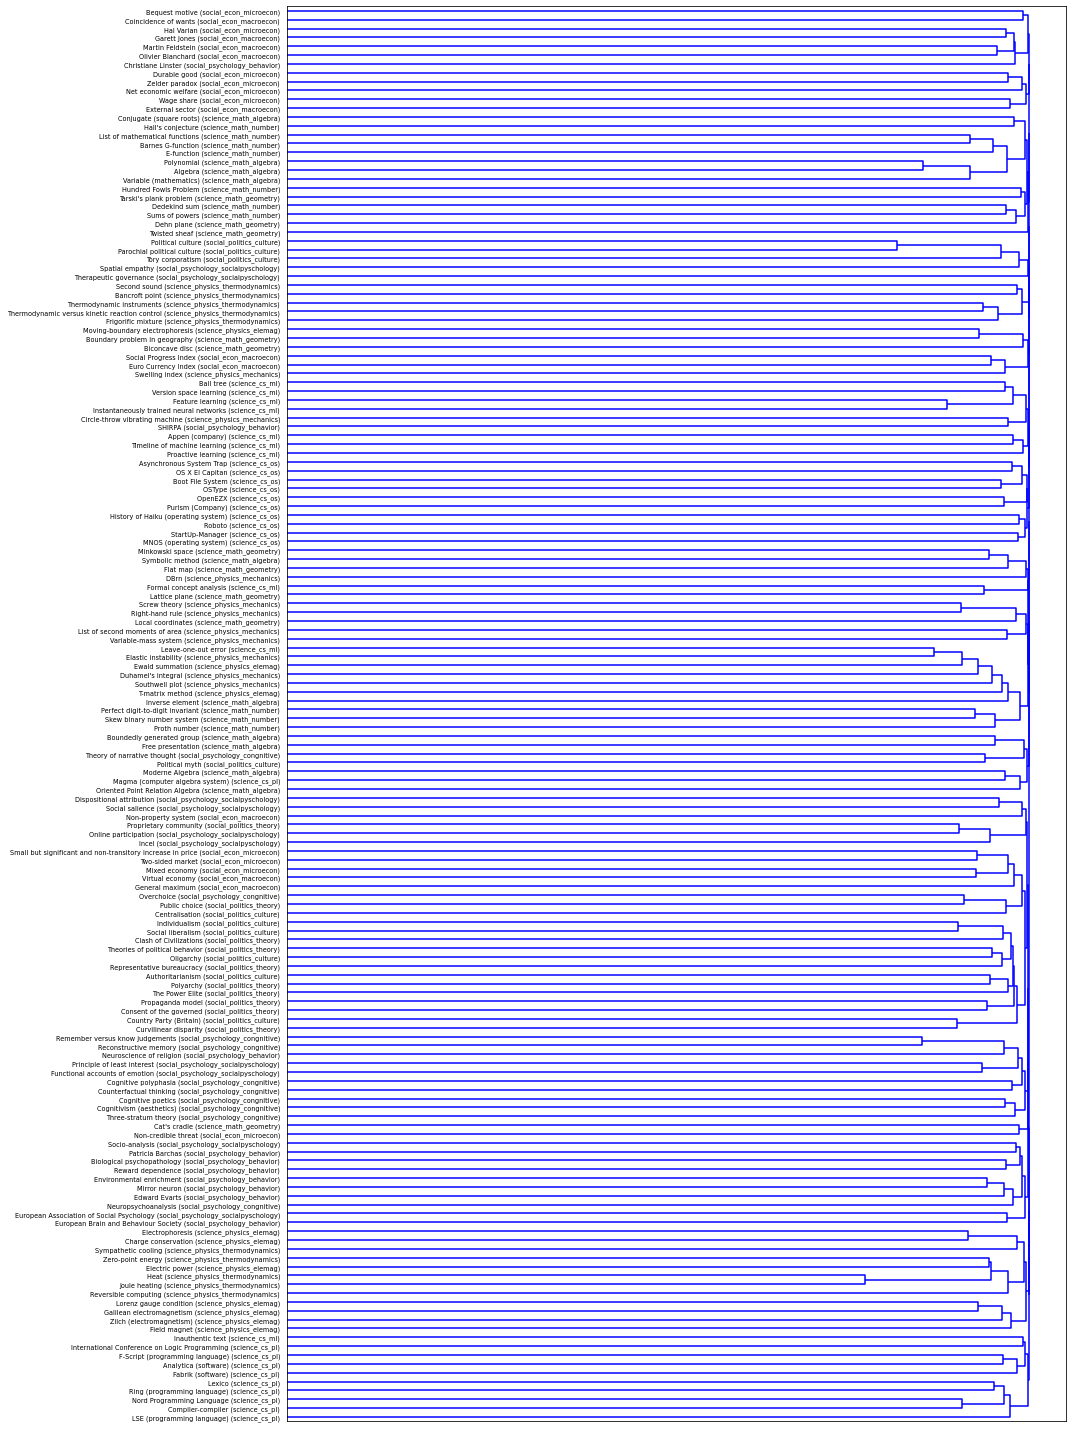

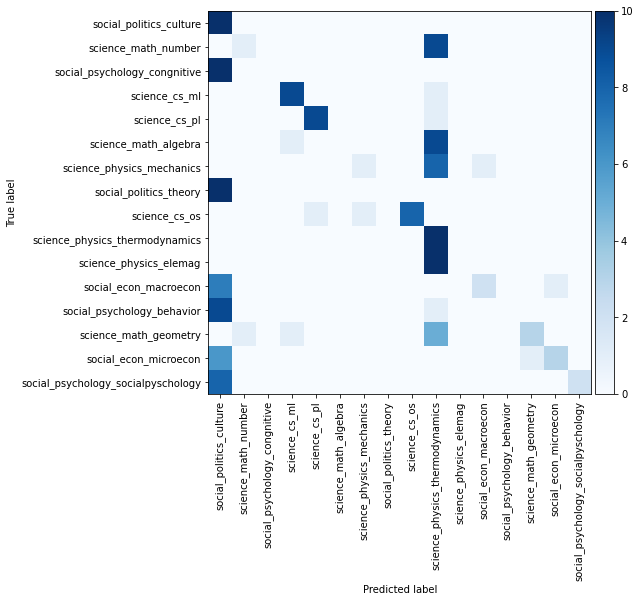

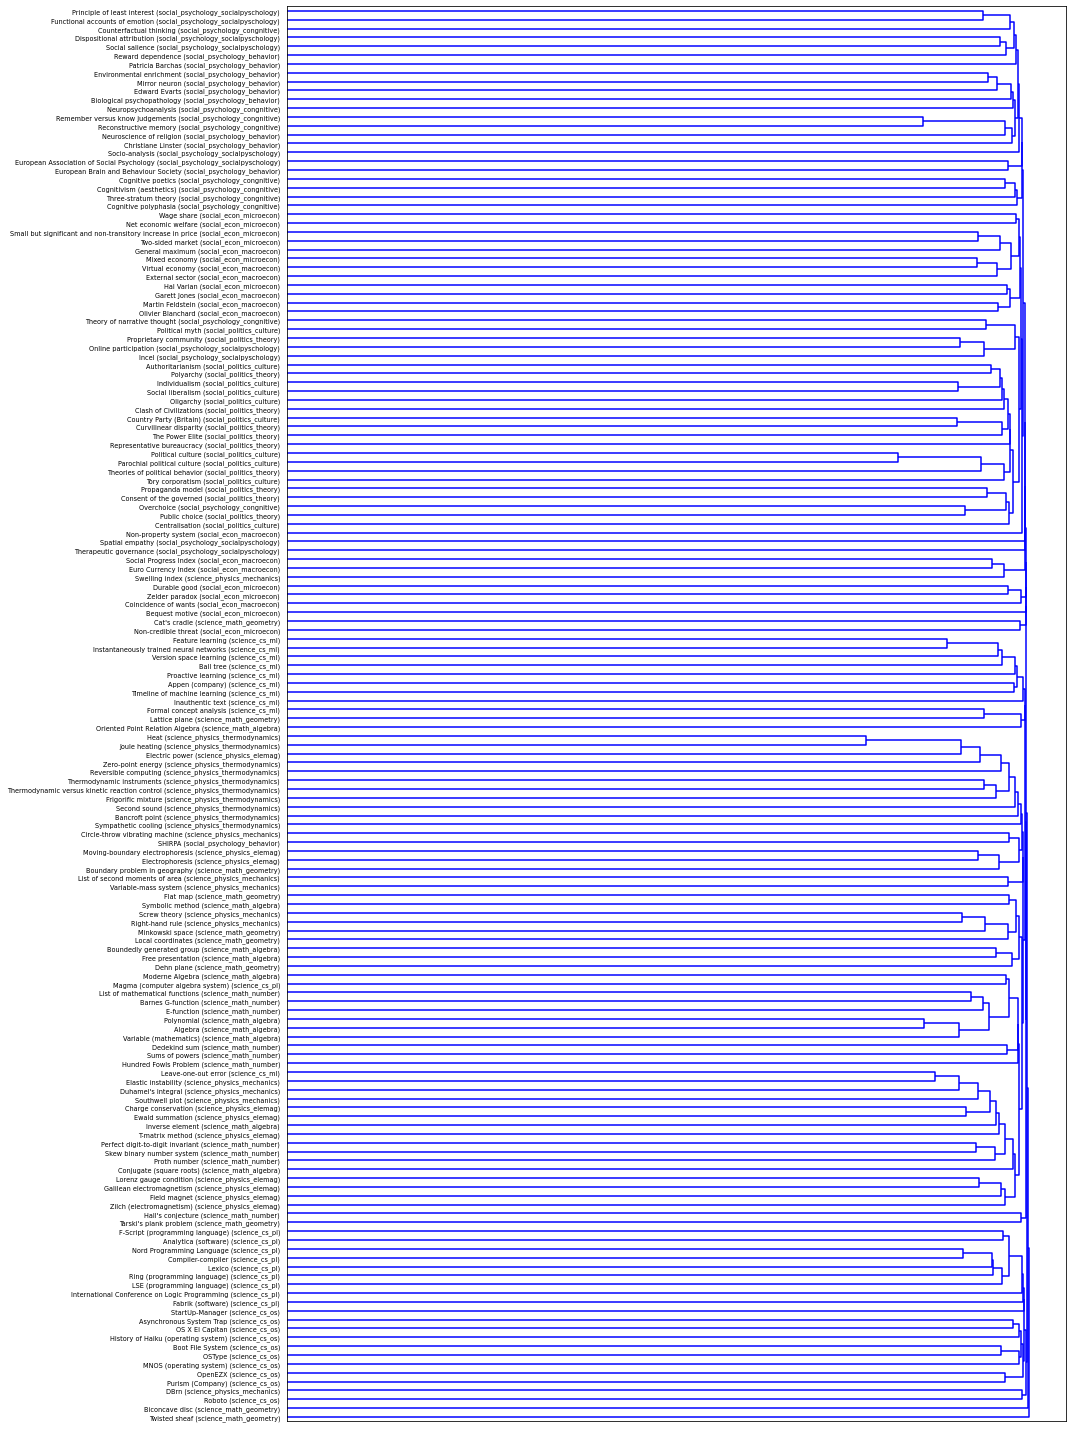

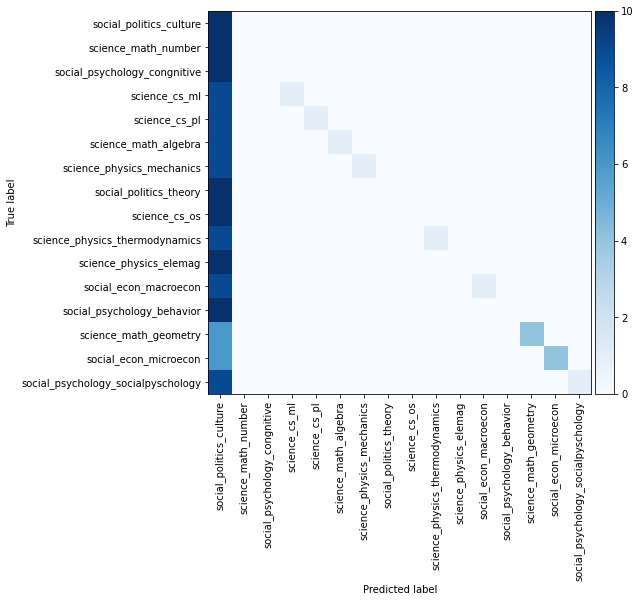

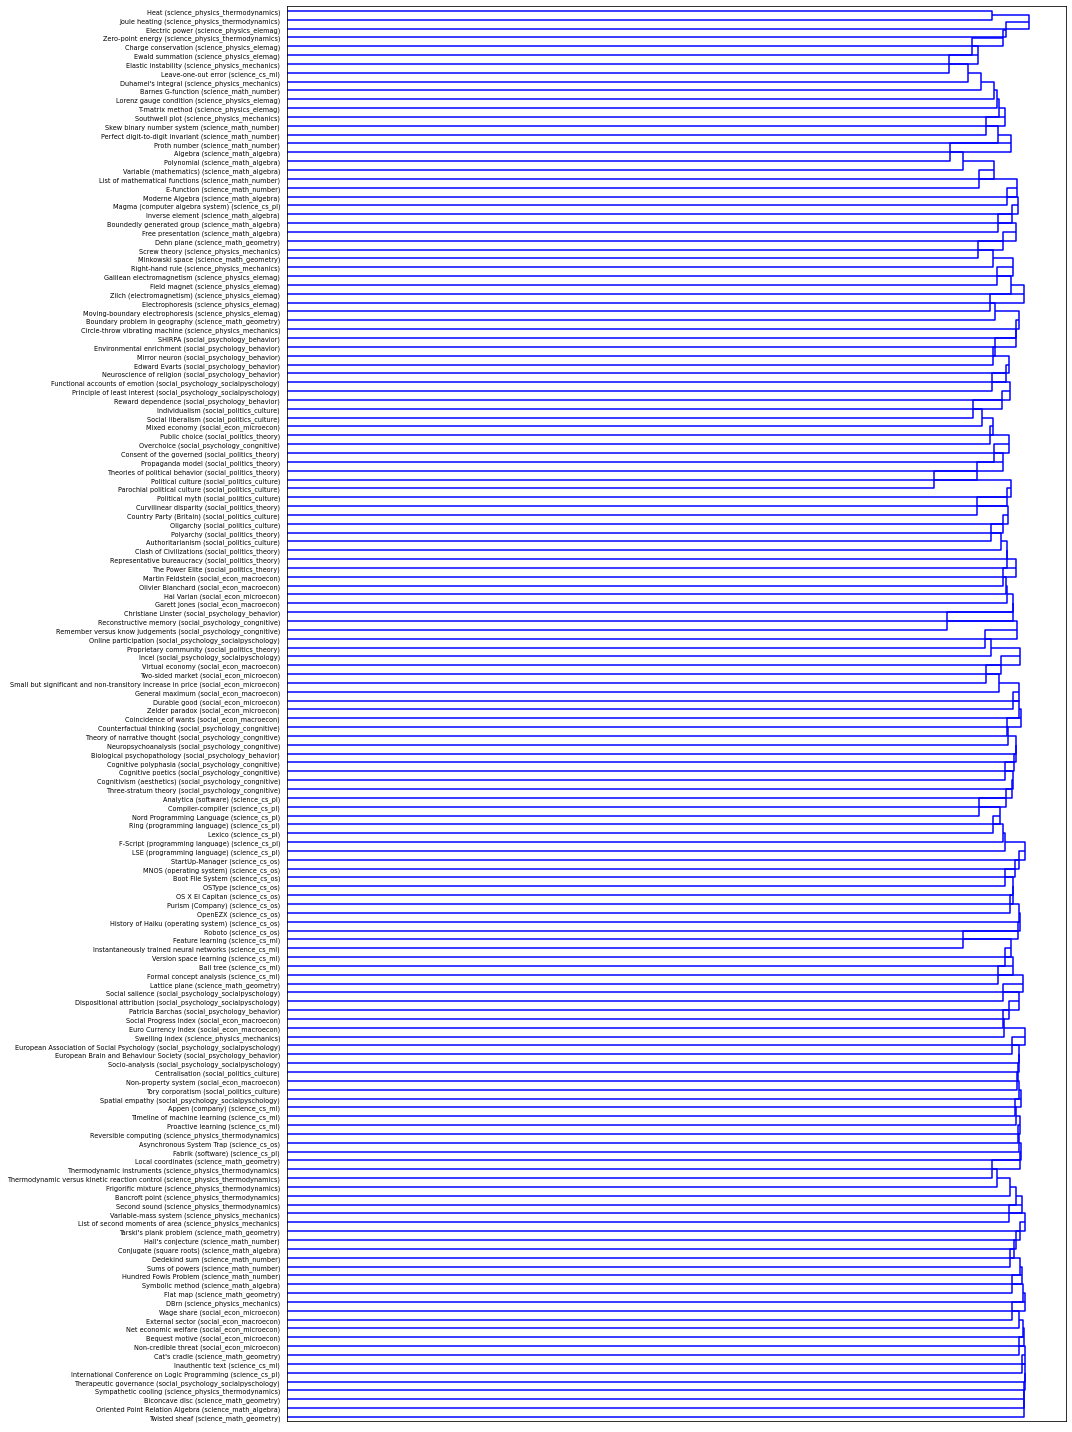

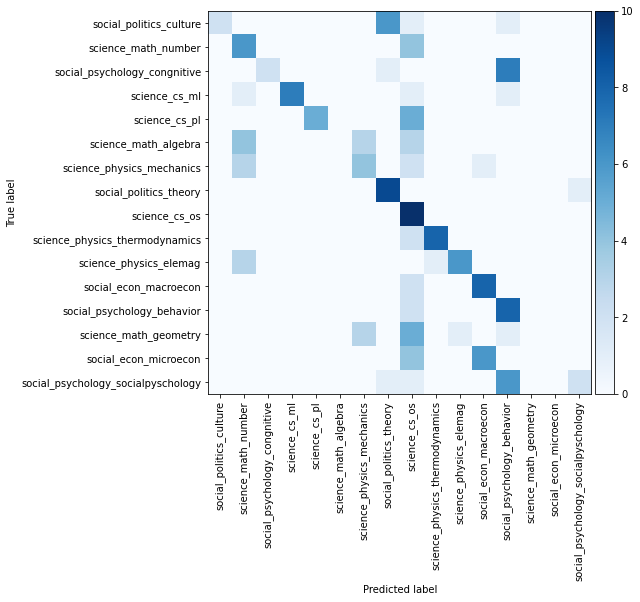

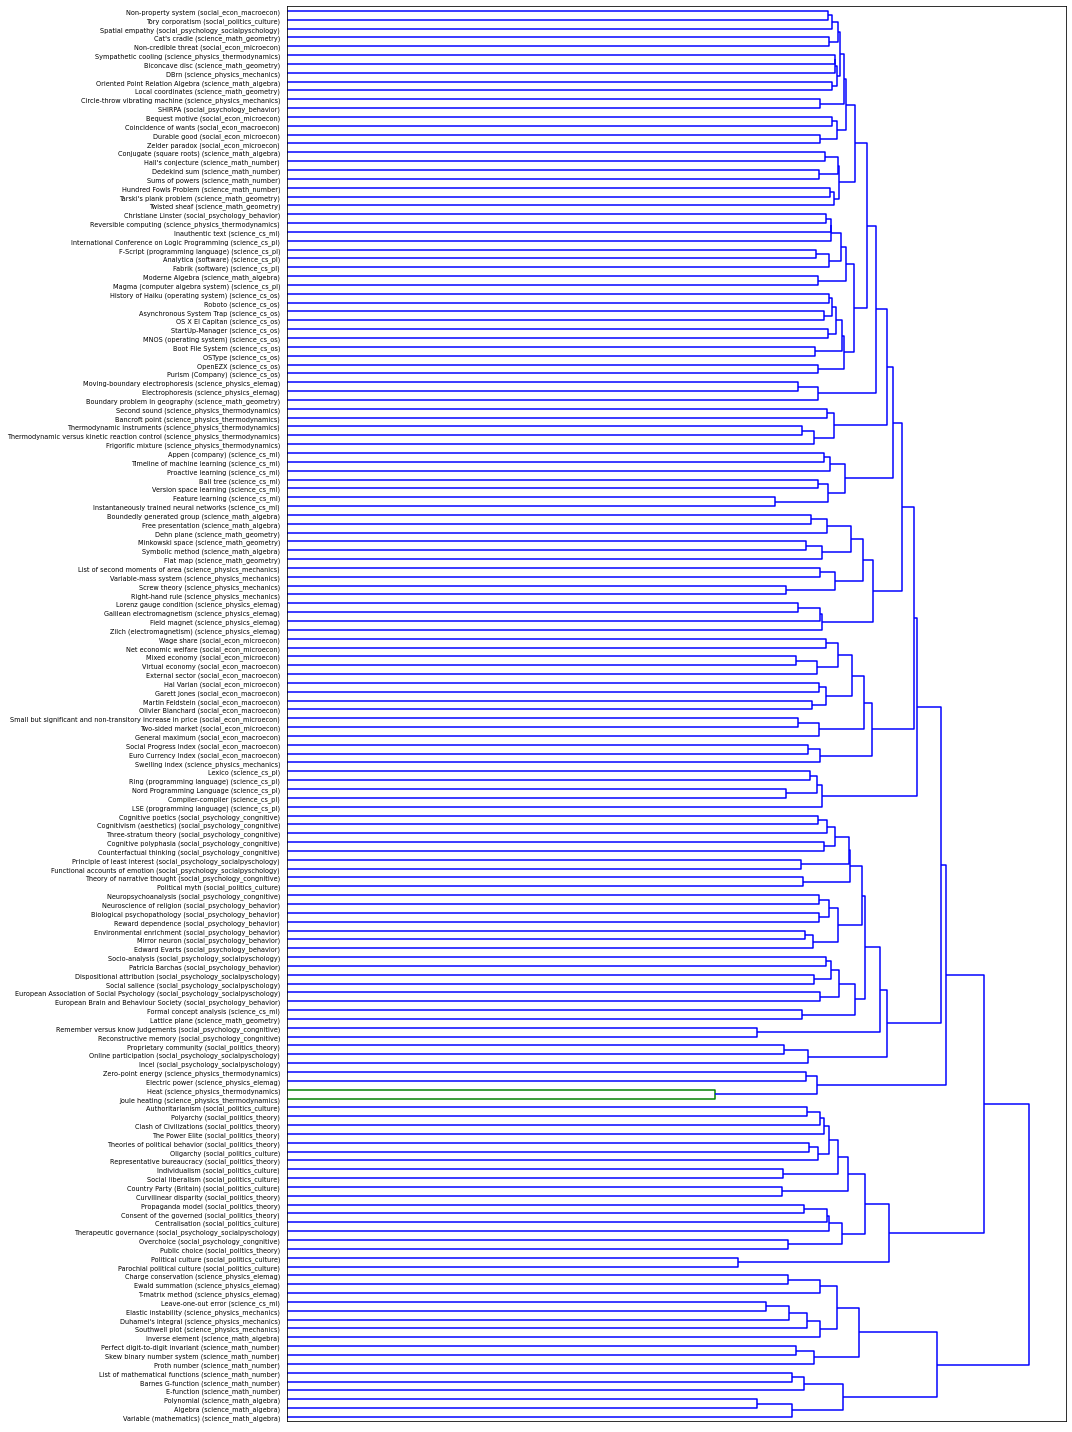

In [10]:
    """
    Agglomerative (Hierarchical) clustering
    ------
    Input
      features: 2d array of shape (n_data, n_dim), data to cluster
      method: string, methods to compute distances between clusters
              Options: "single"|"complete"|"average"|"weighted"|"centroid"
                        |"median"|"ward"
      metric: string, distance metric to use (default: "euclidean")
              See the "scipy.spatial.distance.pdist" for a list of valid 
              distance metrics 
    Output
      Z: 2d array of shape (4, n_data-1), linkage matrix
      labels: 1d array of shape (n_data,), index of the cluster each data 
              point belongs to
    """
n_level = 3
labels, titles, cats = utils.get_label(label_path, n_level)
print("Categories: {}".format(cats))

"""
2. Hierarchical clustering
"""
method_lst = ["single","complete","average","median","ward"]
NMI_lst = []
purity_lst = []
fs = np.load(feature_path, allow_pickle=True)[()]
for me in method_lst:
  linkage_matrix, pred = hierarchical_cluster(
      fs.toarray(), n_clusters=len(cats), method=me, metric='euclidean'
  )
  _, cm, purity = get_purity(pred, labels)
  nmi = get_nmi(pred, labels)
  NMI_lst.append(nmi)
  purity_lst.append(purity)
  plot_confusion_matrix(
      cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
  )
  print("{}, NMI: {}, Purity: {}".format(me, nmi, purity))
  plot_dendrogram(
      linkage_matrix, titles, orientation='right', figsize=(15, 20), rotation=0
  )

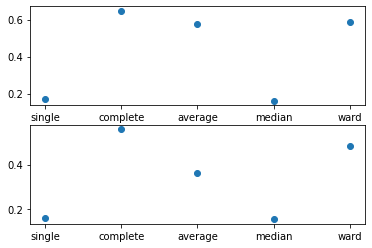

In [20]:
fig = plt.figure()
ax1=plt.subplot(2, 1, 1)
ax1.scatter(method_lst, NMI_lst)
ax2 = plt.subplot(2, 1, 2)
ax2.scatter(method_lst, purity_lst)
plt.show()

Using K-means!
K-means, NMI: 0.575, Purity: 0.475


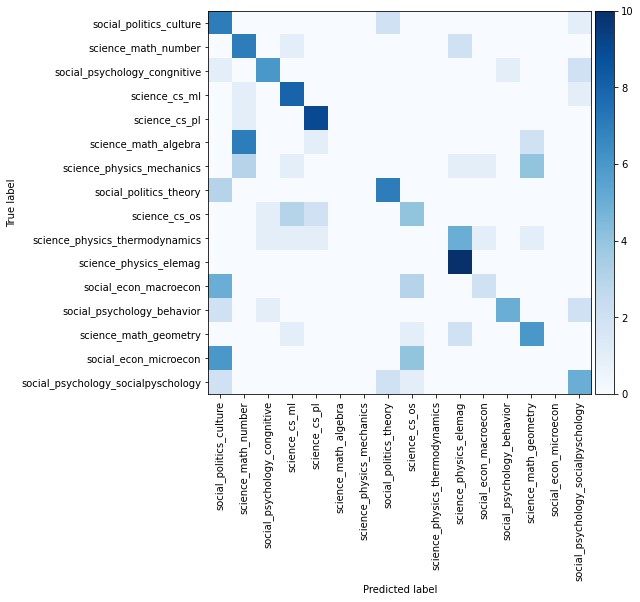

Using K-means!
K-means, NMI: 0.626, Purity: 0.544


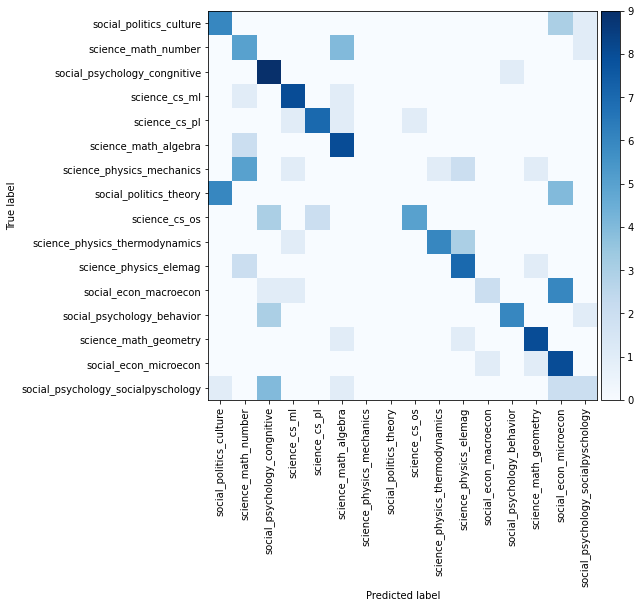

Using K-means!
K-means, NMI: 0.583, Purity: 0.487


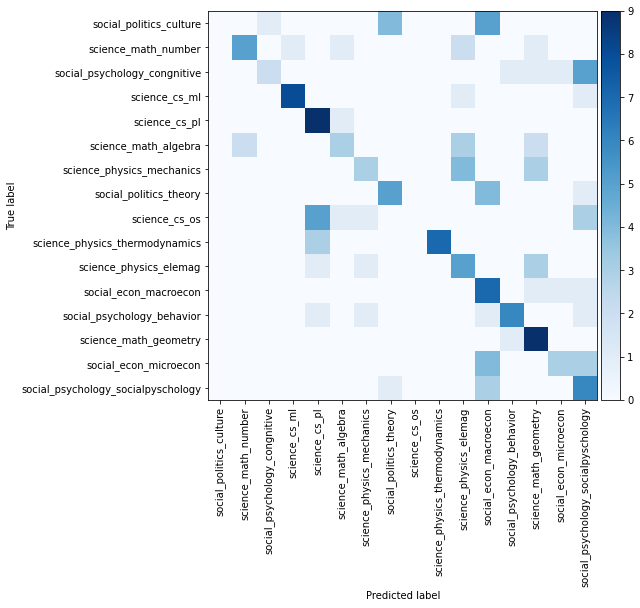

Using K-means!
K-means, NMI: 0.522, Purity: 0.438


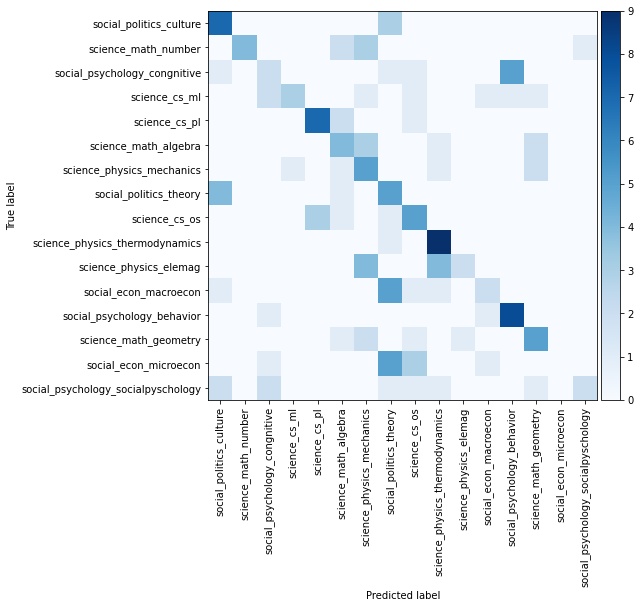

Using K-means!
K-means, NMI: 0.575, Purity: 0.512


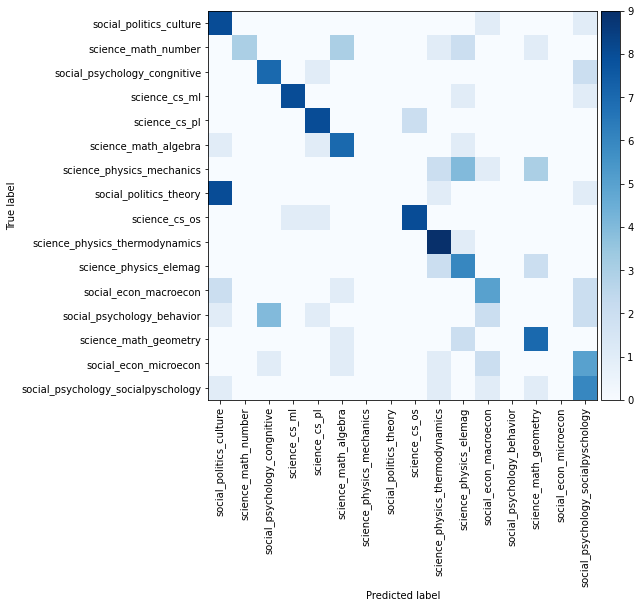

Using K-means!
K-means, NMI: 0.542, Purity: 0.469


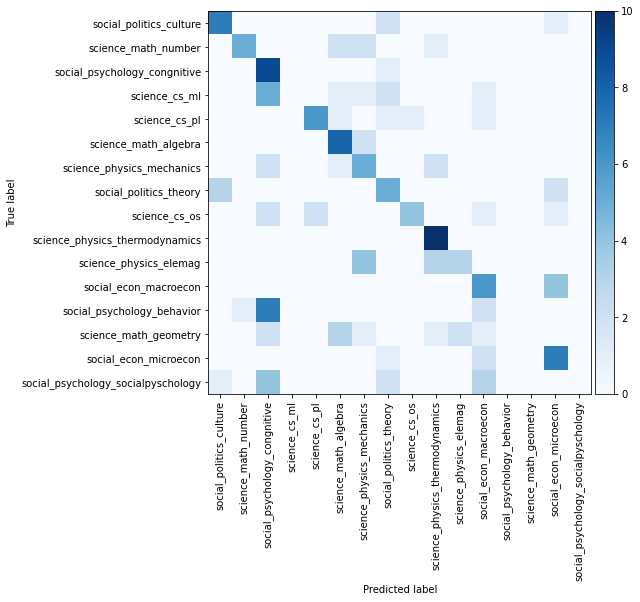

Using K-means!
K-means, NMI: 0.605, Purity: 0.500


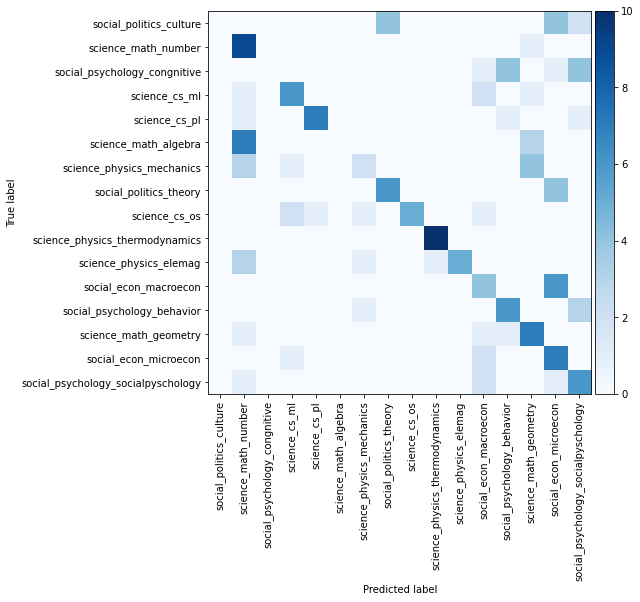

Using K-means!
K-means, NMI: 0.593, Purity: 0.475


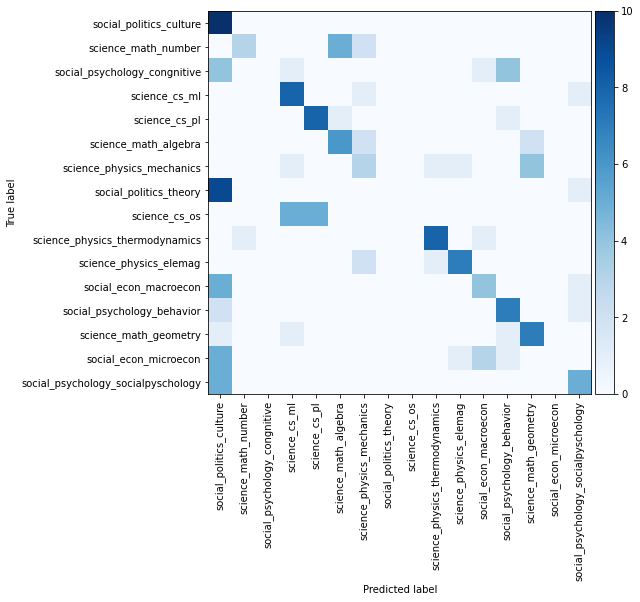

Using K-means!
K-means, NMI: 0.580, Purity: 0.469


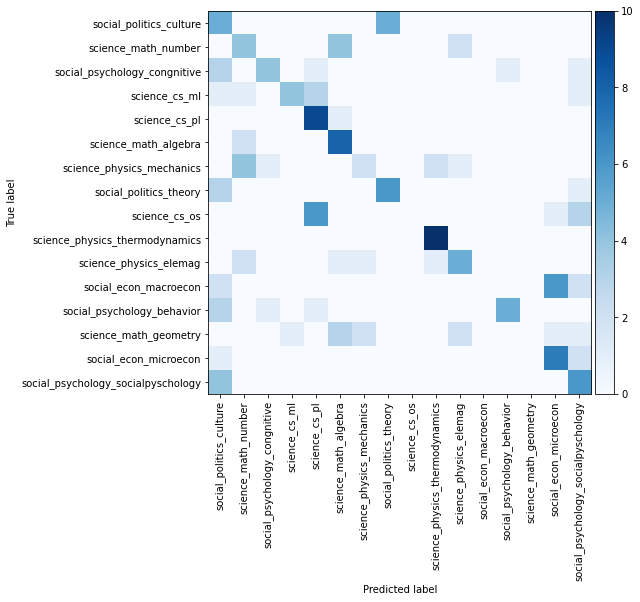

Using K-means!
K-means, NMI: 0.549, Purity: 0.463


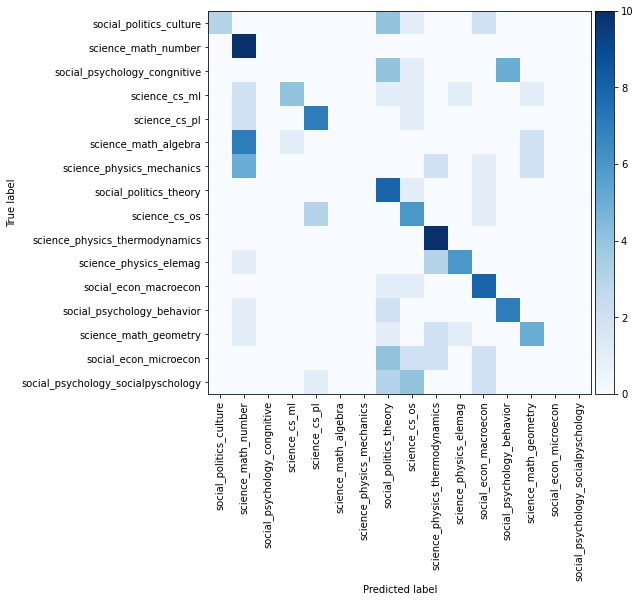

Using K-means!
K-means, NMI: 0.576, Purity: 0.500


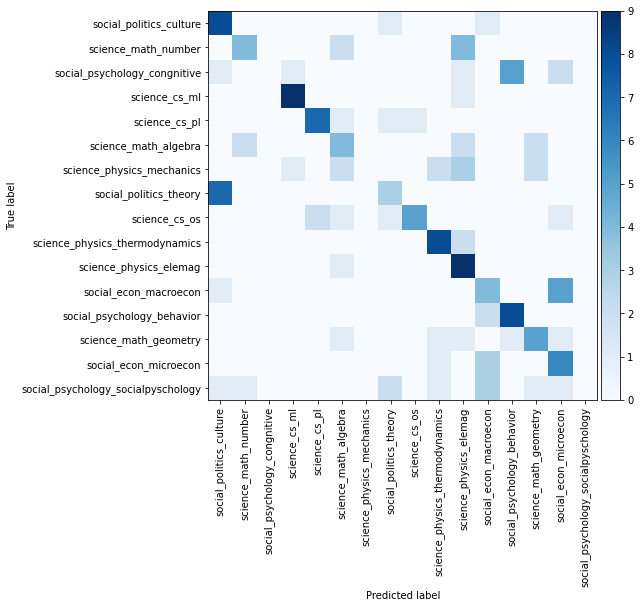

Using K-means!
K-means, NMI: 0.598, Purity: 0.519


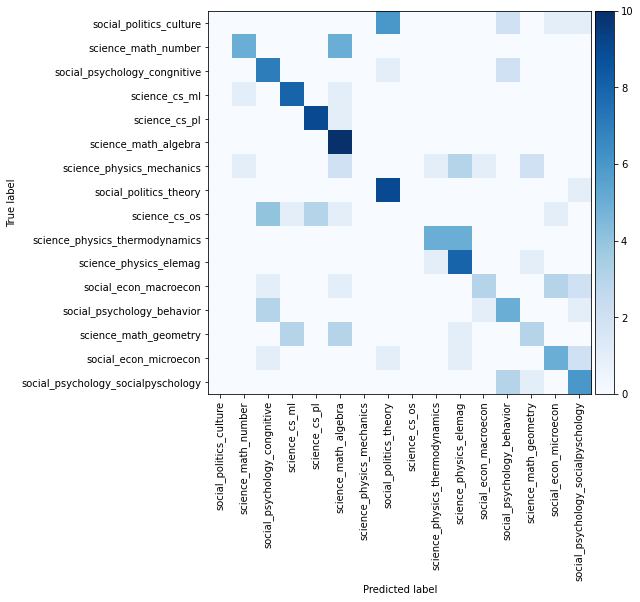

Using K-means!
K-means, NMI: 0.593, Purity: 0.481


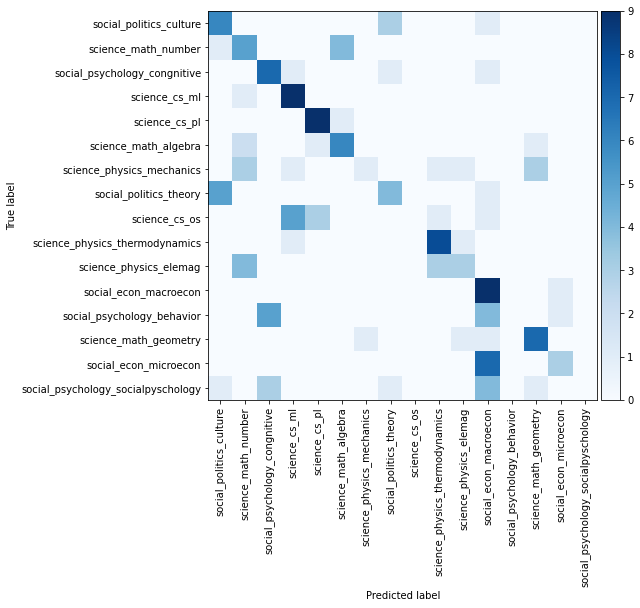

Using K-means!
K-means, NMI: 0.600, Purity: 0.494


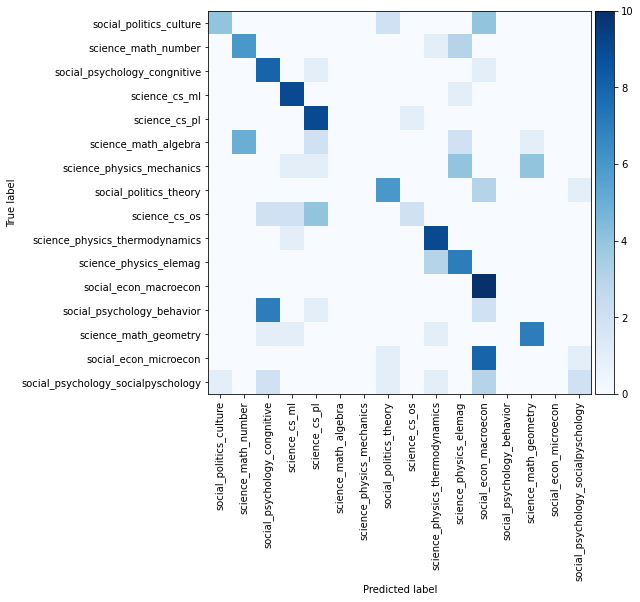

Using K-means!
K-means, NMI: 0.598, Purity: 0.487


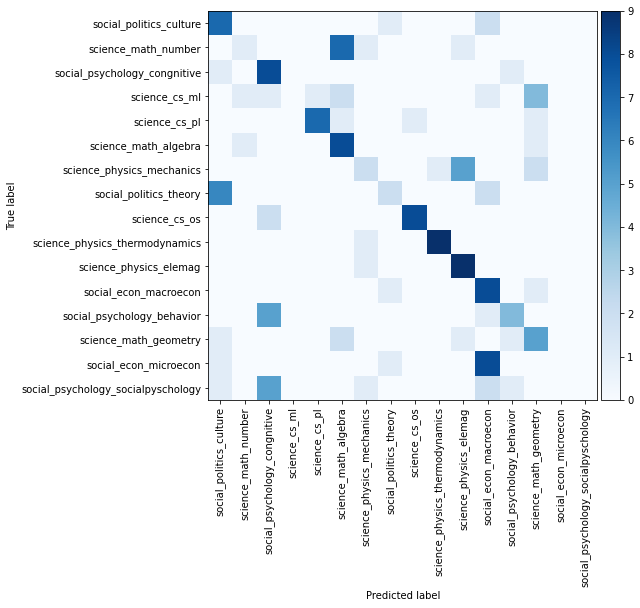

Using K-means!
K-means, NMI: 0.539, Purity: 0.456


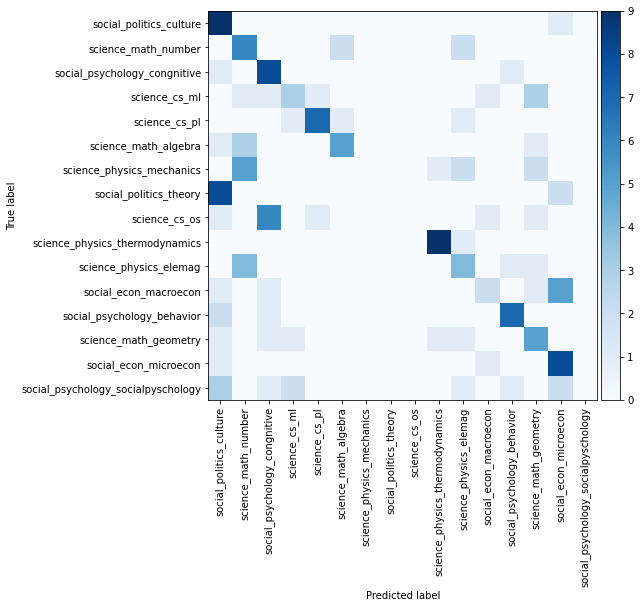

Using K-means!
K-means, NMI: 0.577, Purity: 0.450


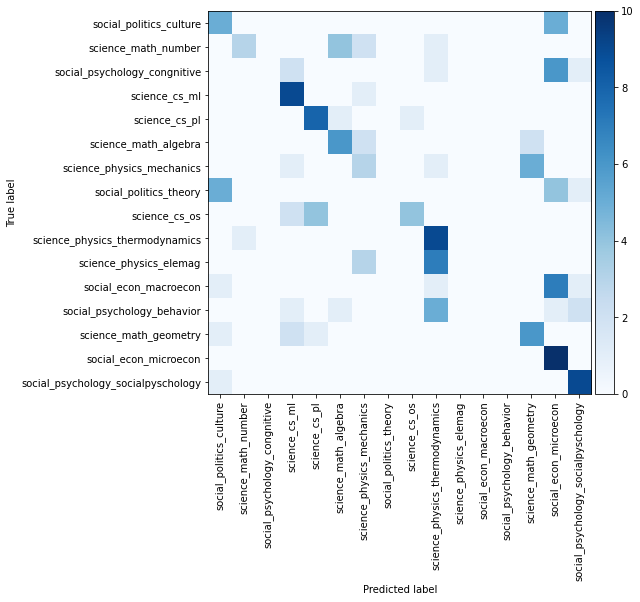

Using K-means!
K-means, NMI: 0.584, Purity: 0.494


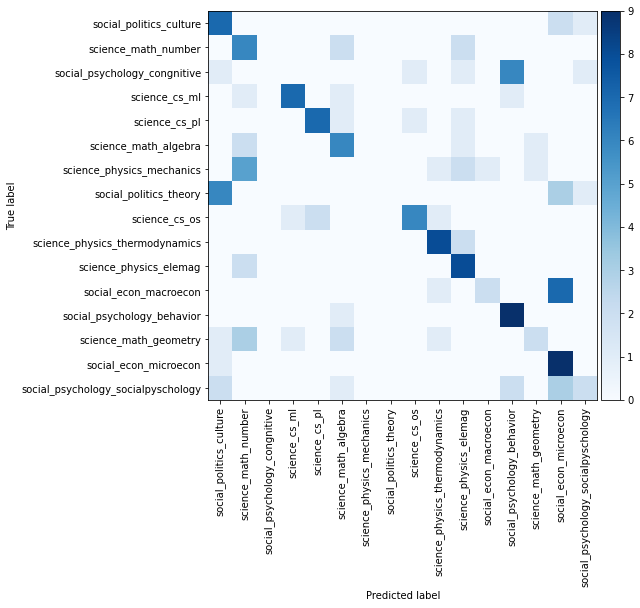

Using K-means!
K-means, NMI: 0.591, Purity: 0.481


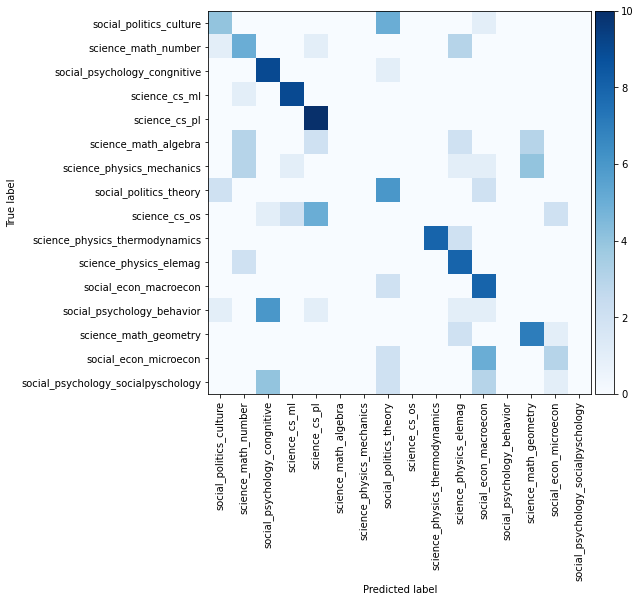

Using K-means!
K-means, NMI: 0.606, Purity: 0.512


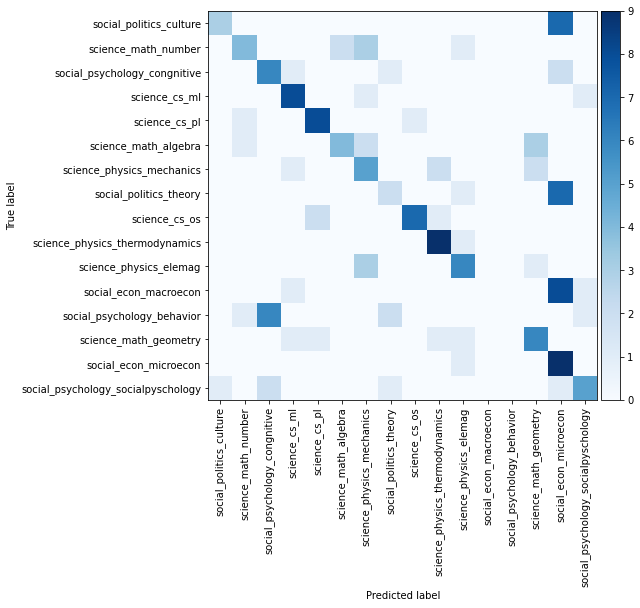

In [28]:
"""
3. Flat clustering 
"""

nr_list = [5,10,15,20]
maxrun_lst = [100,200,300,400,500]
pu_km_np = np.zeros([len(nr_list),len(maxrun_lst)])
nmi_km_np = np.zeros([len(nr_list),len(maxrun_lst)])
for nr in range(len(nr_list)):
  for mr in range(len(maxrun_lst)):
    pred = kmeans_cluster(fs, len(cats), n_rounds=nr_list[nr], maxrun=maxrun_lst[mr])
    _, cm, purity = get_purity(pred, labels)
    nmi = get_nmi(pred, labels)
    pu_km_np[nr,mr] = purity
    nmi_km_np[nr,mr] = nmi
    plot_confusion_matrix(
        cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
    )
    print("K-means, NMI: %.3f, Purity: %.3f" % (nmi, purity))
    plt.show()

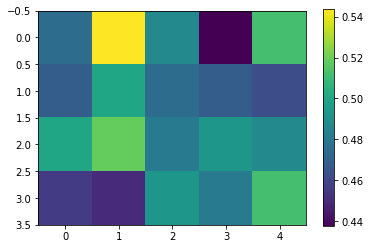

In [30]:
#Purity plot
plt.imshow(pu_km_np)
plt.colorbar()
plt.show()

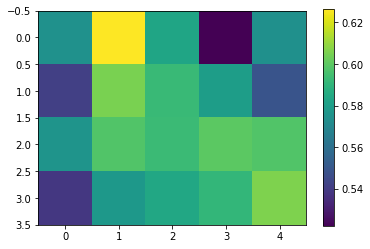

In [31]:
#NMI plot
plt.imshow(nmi_km_np)
plt.colorbar()
plt.show()

In [36]:
nmi_km_np[0,1]

0.6264322711404832

spectral clustering, NMI: 0.562, Purity: 0.463


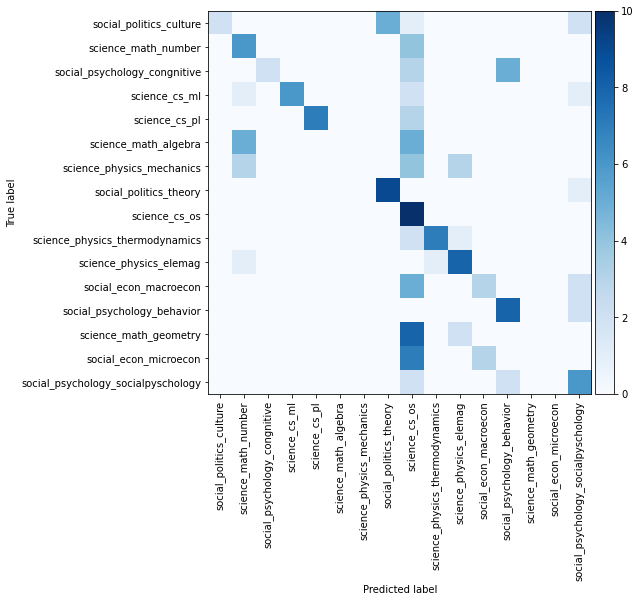

spectral clustering, NMI: 0.581, Purity: 0.481


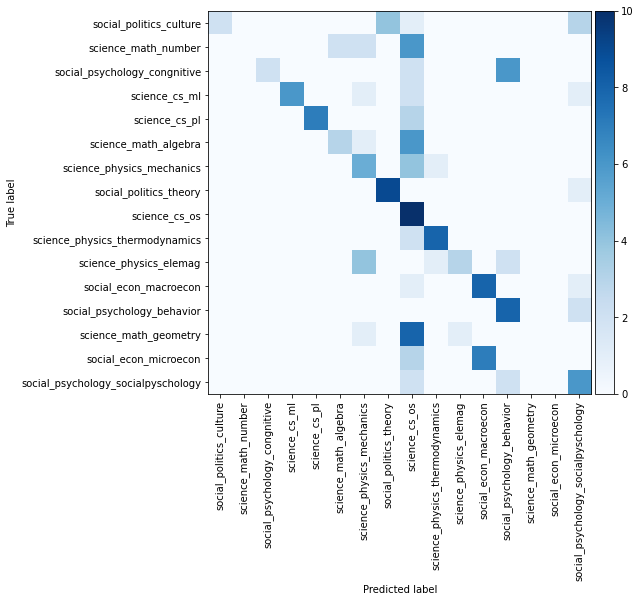

In [25]:
"""
3. My clustering, spectral clustering
"""
pu_my_lst = []
nmi_my_lst = []
af_lst = ['rbf','nearest_neighbors']
for af in af_lst:
  pred = my_cluster(fs, len(cats), affinity = af)
  _, cm, purity = get_purity(pred, labels)
  nmi = get_nmi(pred, labels)
  pu_my_lst.append(purity)
  nmi_my_lst.append(nmi)
  plot_confusion_matrix(
      cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
  )
  print("spectral clustering, NMI: %.3f, Purity: %.3f" % (nmi, purity))
  plt.show()

##Answers to 3.3

A total of 3 clustering methods is experimented on the dataset to generate 16 clusters. 

For the agglomerative methods, 5 different methods is tested out which is ["single","complete","average","median","ward"] respectively. Out of these 5 methods, based on the TMI and purity value, complete and ward performed best, single and median performed worst. From the confusion matrix generated of single and median methods, most of the clusters is clustered into social politics culture, suggesting the data structure is not uniformly seperated. Some of the documents from different classes are closely related and some of the documents are more different than others. Complete method performed best with NMI: 0.65, Purity: 0.56

For the kmeans methods, different maxrun is assigned to see if the kmeans finished training(if increase in maxrun would result a better accuracy) and different n_rounds is assigned to see if the kmeans have enough sampling of data. The result is very inconsistent. Based on the TMI and purity, the model with most maxrun steps and most number of rounds does not indicate the best clustering result. The best clustering result is generated when n_rounds = 5 and maxrun = 200, provide NMI: 0.626, Purity: 0.544

For the spectral clustering methods, two different graph was experimented, one is fully connected graph with edge weights calculated through rbf kernels, the other one is 10 nearest neighbor graph. 10 nearest neighboring provide better result with NMI: 0.581, Purity: 0.481.

Out of all three clustering methods, the agglomerative methods have the best performance, following by k-means methods and spectral clustering methods. However, k-means does not necessarily always generate the consistent results, depending on the hyperparameters and random initiation of the means.


## 3.4 experiments

Using hierarchical clustering!
clusters: 2, method: single, NMI: 0.009986126851887689, Purity: 0.5625
Using hierarchical clustering!
clusters: 2, method: complete, NMI: 0.13813224834952653, Purity: 0.71875
Using hierarchical clustering!
clusters: 2, method: average, NMI: 0.009986126851887689, Purity: 0.5625
Using hierarchical clustering!
clusters: 2, method: median, NMI: 0.009986126851887689, Purity: 0.5625
Using hierarchical clustering!
clusters: 2, method: ward, NMI: 0.12893745427594566, Purity: 0.5625
Using hierarchical clustering!
clusters: 6, method: single, NMI: 0.05613922934526776, Purity: 0.21875
Using hierarchical clustering!
clusters: 6, method: complete, NMI: 0.42456874386815446, Purity: 0.5375
Using hierarchical clustering!
clusters: 6, method: average, NMI: 0.5511103101489938, Purity: 0.49375
Using hierarchical clustering!
clusters: 6, method: median, NMI: 0.053951705116337116, Purity: 0.21875
Using hierarchical clustering!
clusters: 6, method: ward, NMI: 0.464597867317248

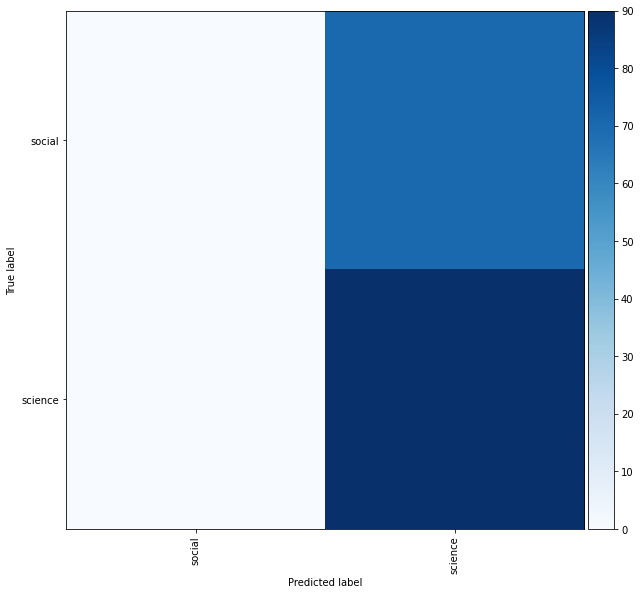

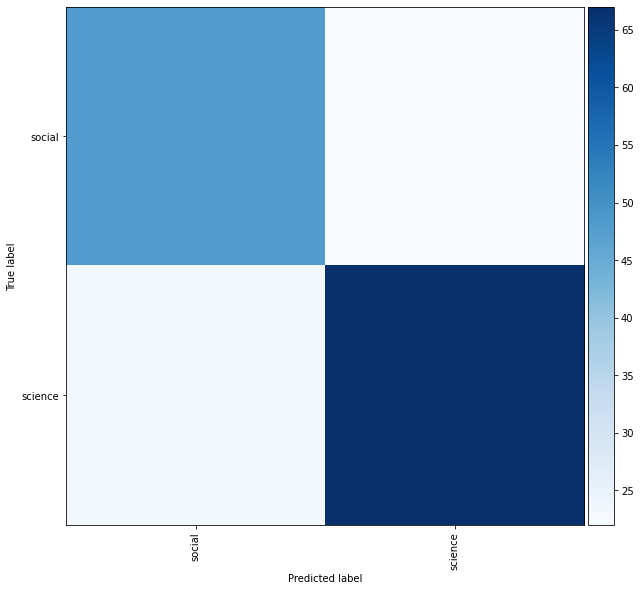

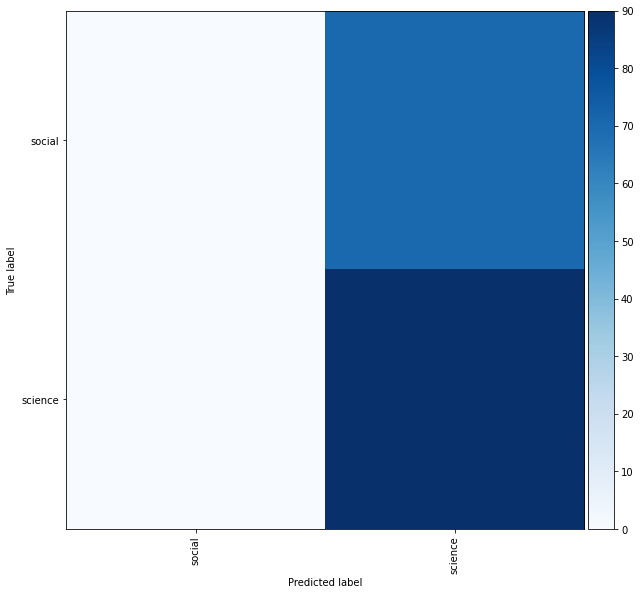

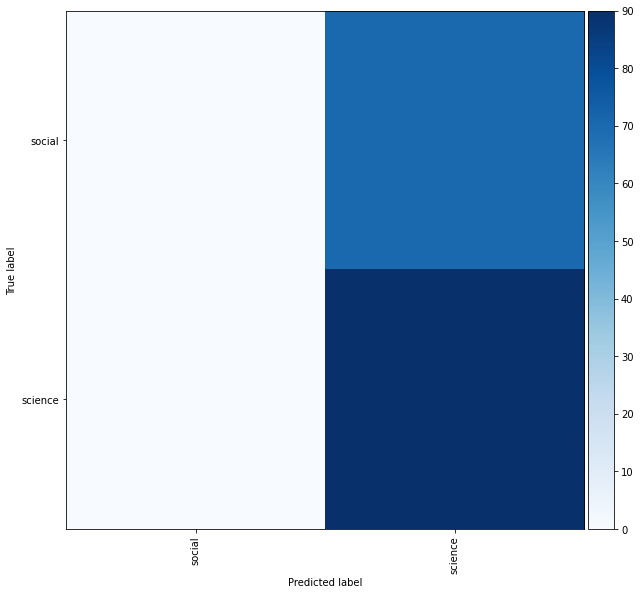

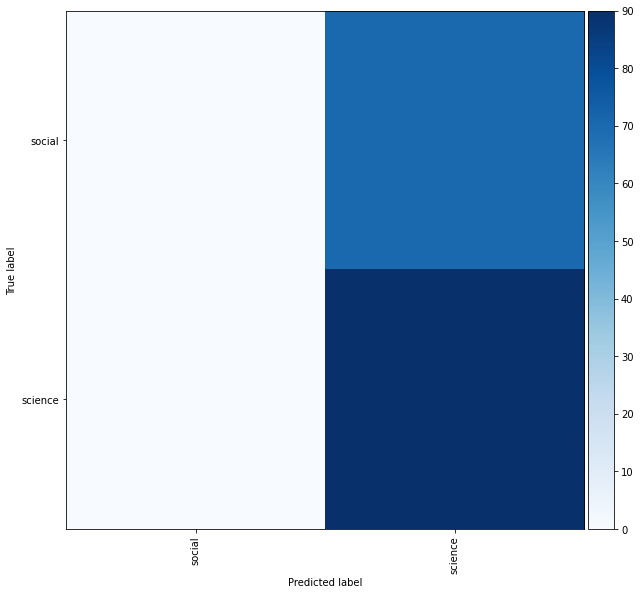

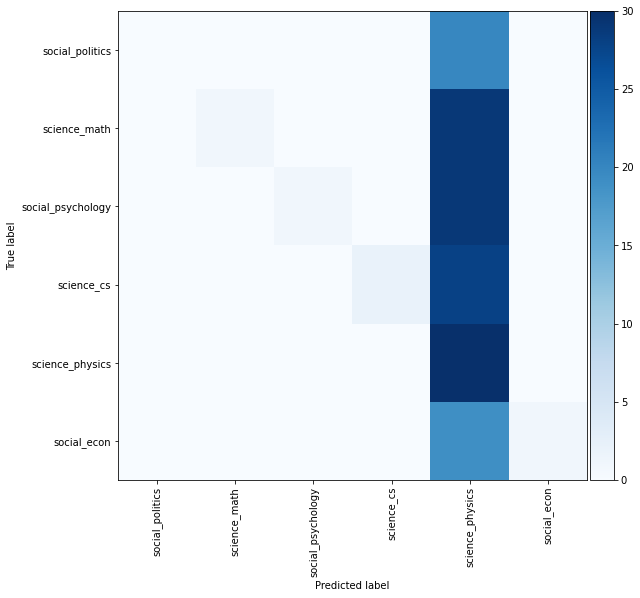

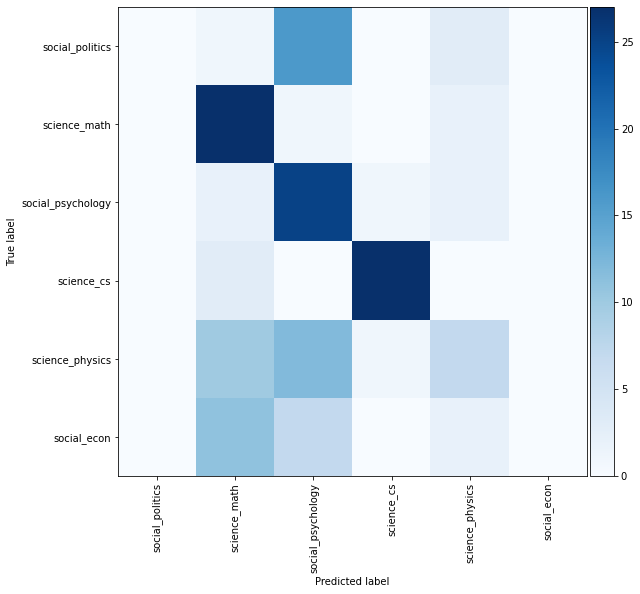

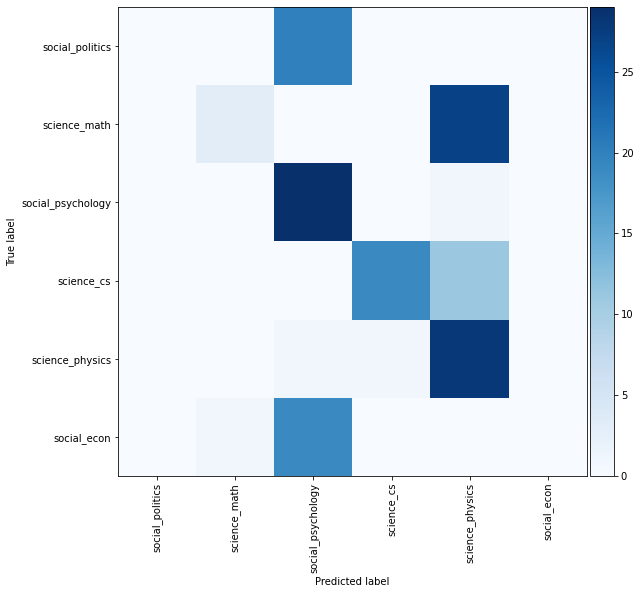

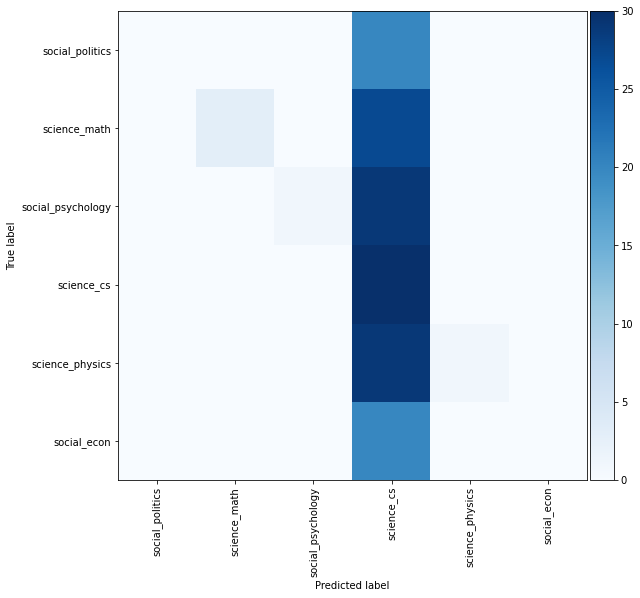

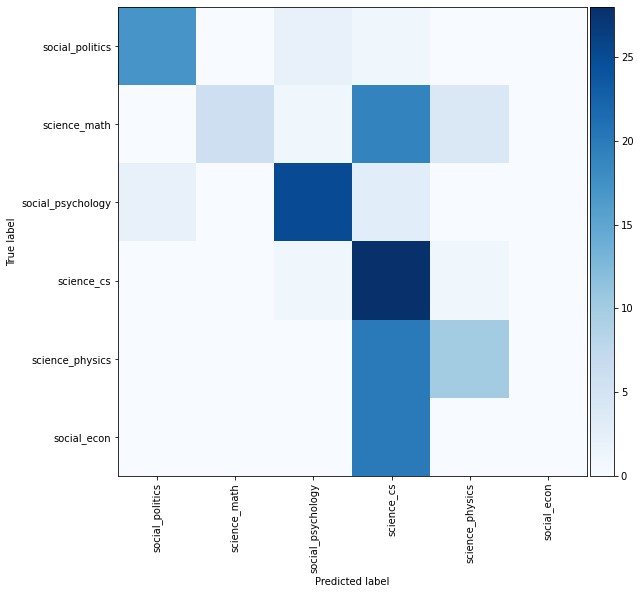

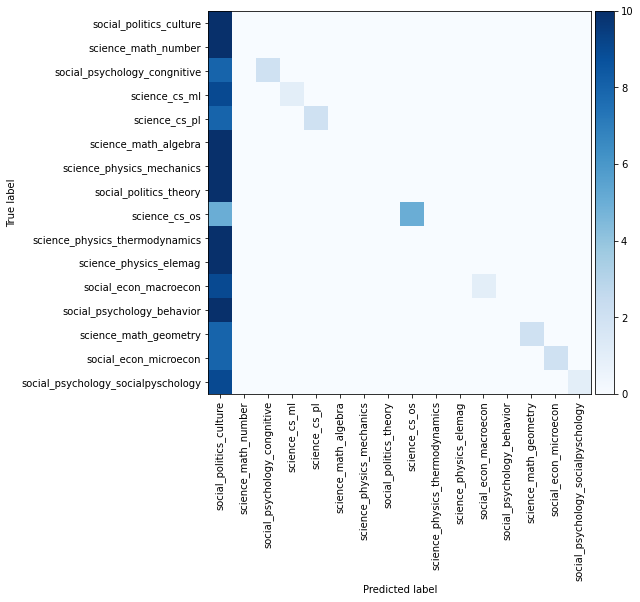

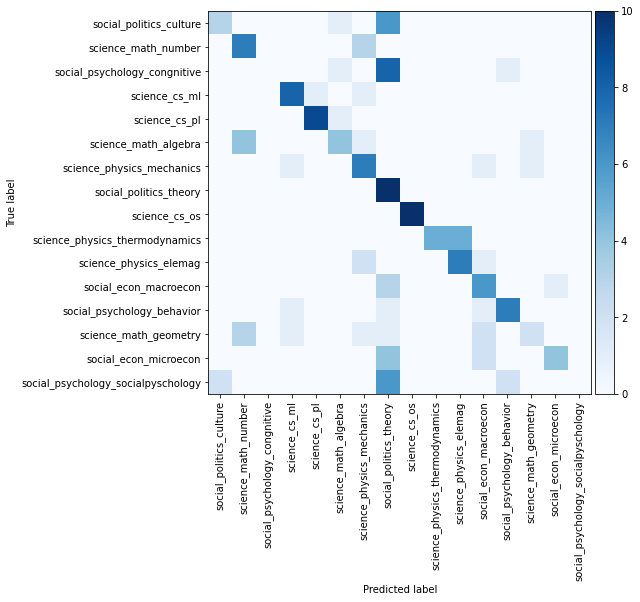

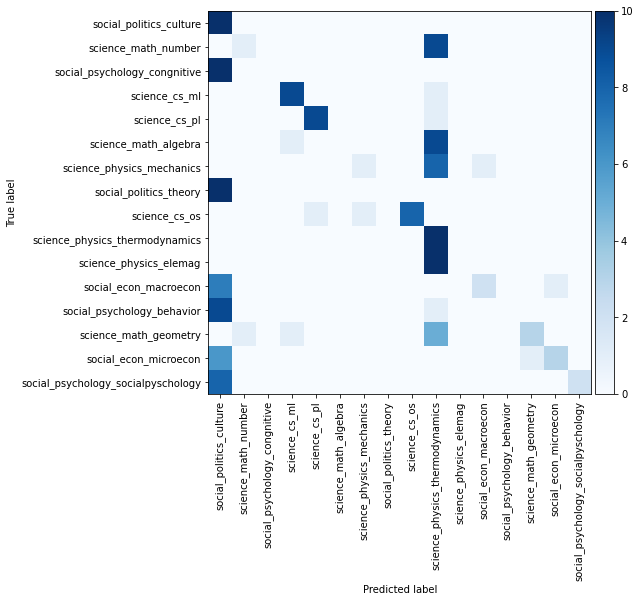

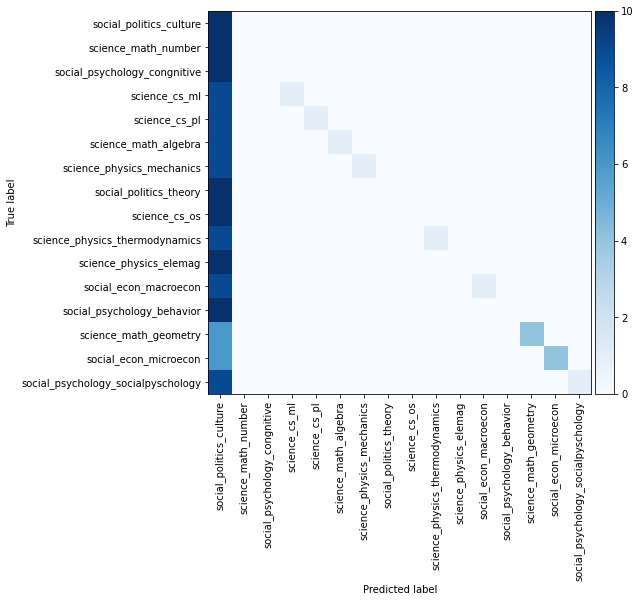

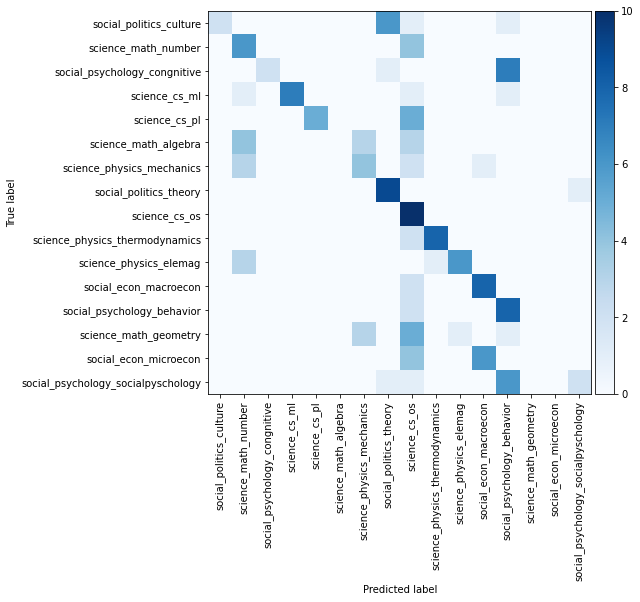

In [41]:
#nclusters 
n_level_lst = [1,2,3]
method_lst = ["single","complete","average","median","ward"]
NMI_np = np.zeros([len(n_clusters_lst),len(method_lst)])
purity_np = np.zeros([len(n_clusters_lst),len(method_lst)])
fs = np.load(feature_path, allow_pickle=True)[()]
for nl in range(len(n_level_lst)):
  labels, titles, cats = utils.get_label(label_path, n_level_lst[nl])
  for me in range(len(method_lst)):
    linkage_matrix, pred = hierarchical_cluster(
        fs.toarray(), n_clusters=len(cats), method=method_lst[me], metric='euclidean'
    )
    _, cm, purity = get_purity(pred, labels)
    nmi = get_nmi(pred, labels)
    NMI_np[nl,me] = nmi
    purity_np[nl,me] = purity
    plot_confusion_matrix(
        cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
    )
    print("clusters: {}, method: {}, NMI: {}, Purity: {}".format(len(cats), method_lst[me], nmi, purity))
    

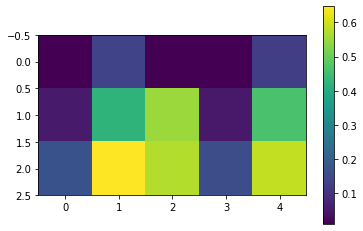

In [42]:
#Purity plot
plt.imshow(NMI_np)
plt.colorbar()
plt.show()

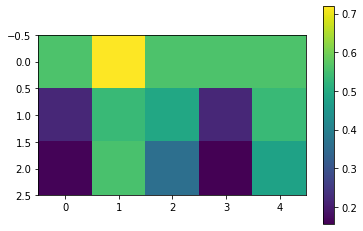

In [43]:
#NMI plot
plt.imshow(purity_np)
plt.colorbar()
plt.show()

Using K-means!
K-means, n_clusters: 2, n_rounds: 5, maxrun: 100 NMI: 0.2274588144778222, Purity: 0.7625


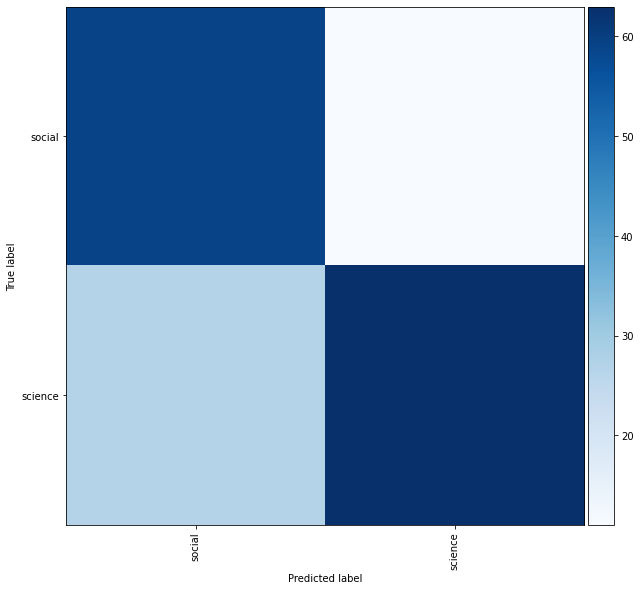

Using K-means!
K-means, n_clusters: 2, n_rounds: 5, maxrun: 200 NMI: 0.1160836102962875, Purity: 0.7


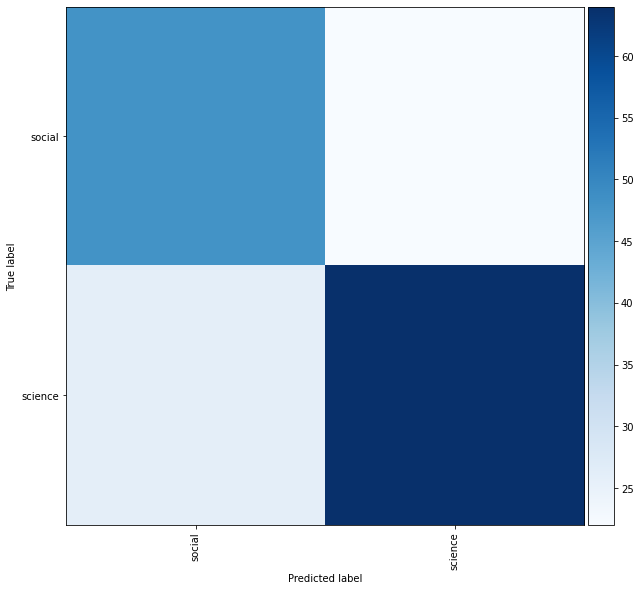

Using K-means!
K-means, n_clusters: 2, n_rounds: 5, maxrun: 300 NMI: 0.19382172974543294, Purity: 0.7375


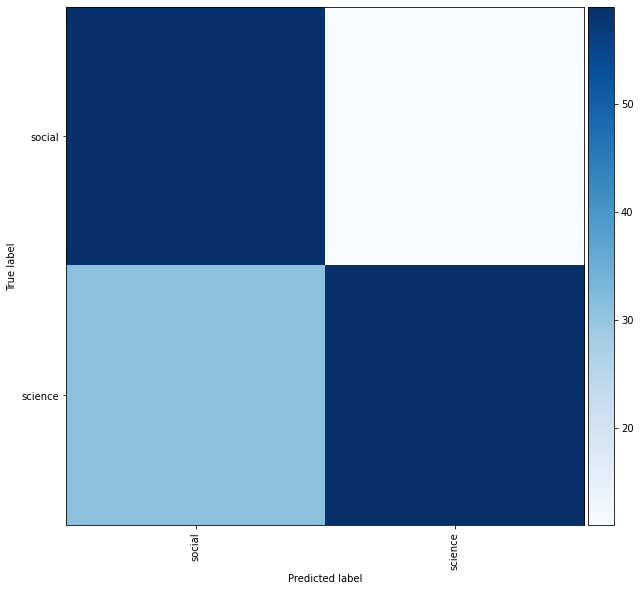

Using K-means!
K-means, n_clusters: 2, n_rounds: 5, maxrun: 400 NMI: 0.42070415381713616, Purity: 0.85625


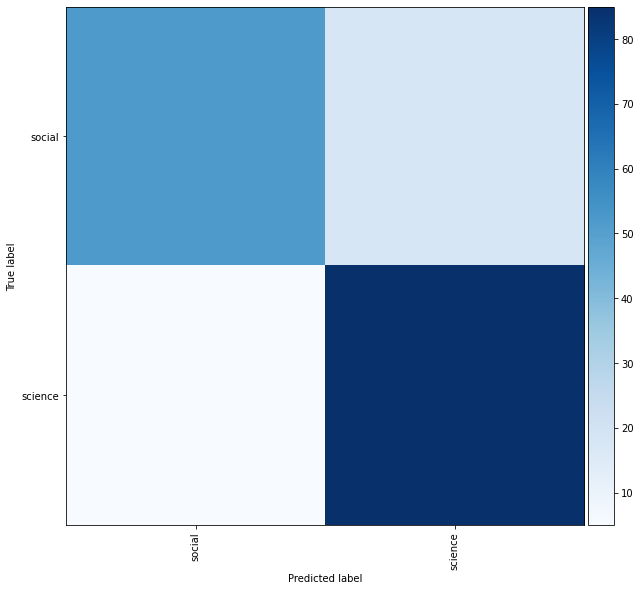

Using K-means!
K-means, n_clusters: 2, n_rounds: 5, maxrun: 500 NMI: 0.41721033004917407, Purity: 0.8625


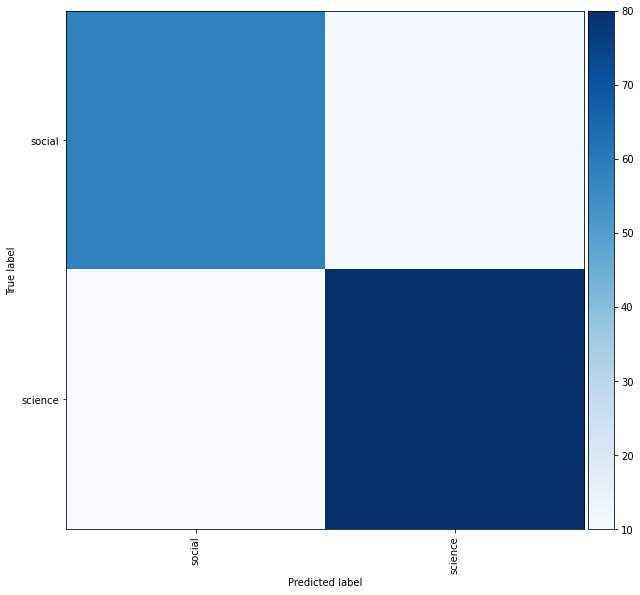

Using K-means!
K-means, n_clusters: 2, n_rounds: 10, maxrun: 100 NMI: 0.3660945440232821, Purity: 0.8375


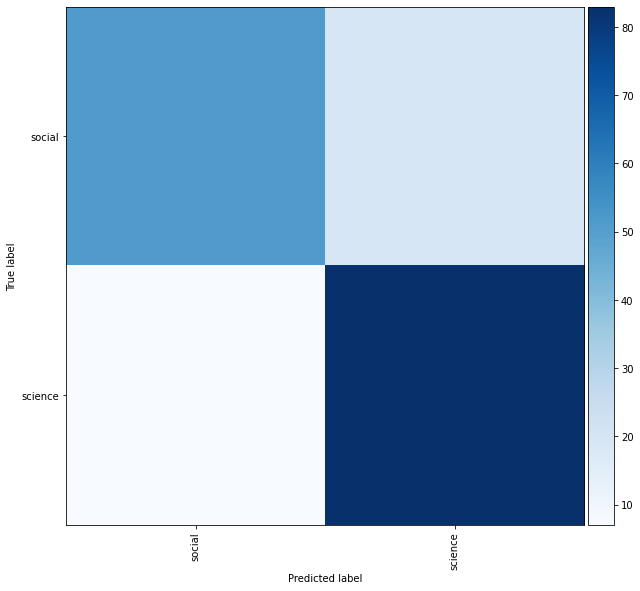

Using K-means!
K-means, n_clusters: 2, n_rounds: 10, maxrun: 200 NMI: 0.25529227784273, Purity: 0.7125


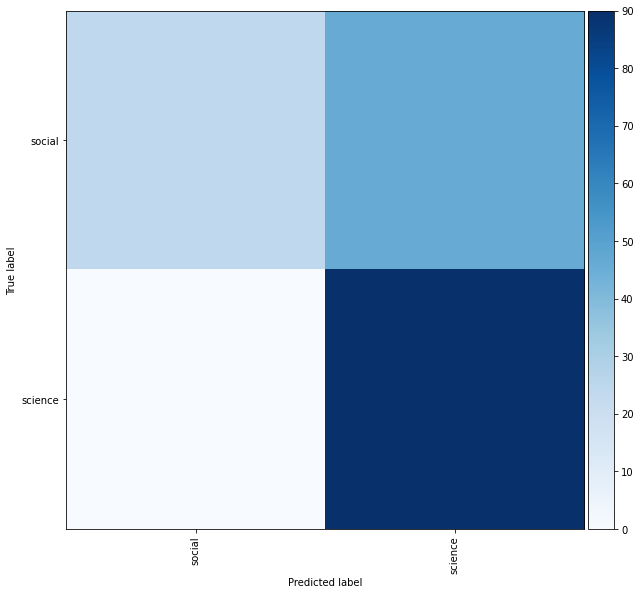

Using K-means!
K-means, n_clusters: 2, n_rounds: 10, maxrun: 300 NMI: 0.3893138413989572, Purity: 0.85


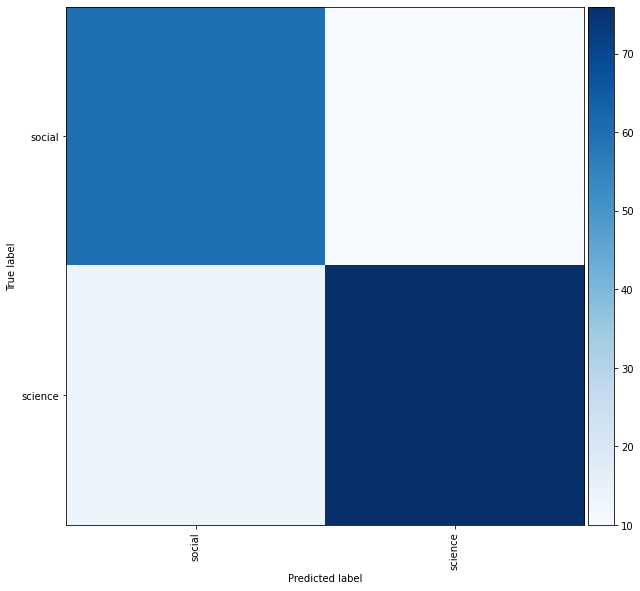

Using K-means!
K-means, n_clusters: 2, n_rounds: 10, maxrun: 400 NMI: 0.38619143574530634, Purity: 0.79375


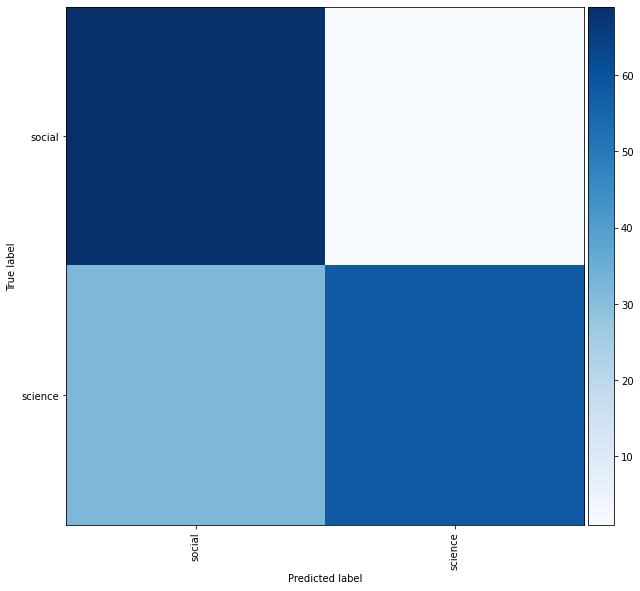

Using K-means!
K-means, n_clusters: 2, n_rounds: 10, maxrun: 500 NMI: 0.3326074853125337, Purity: 0.825


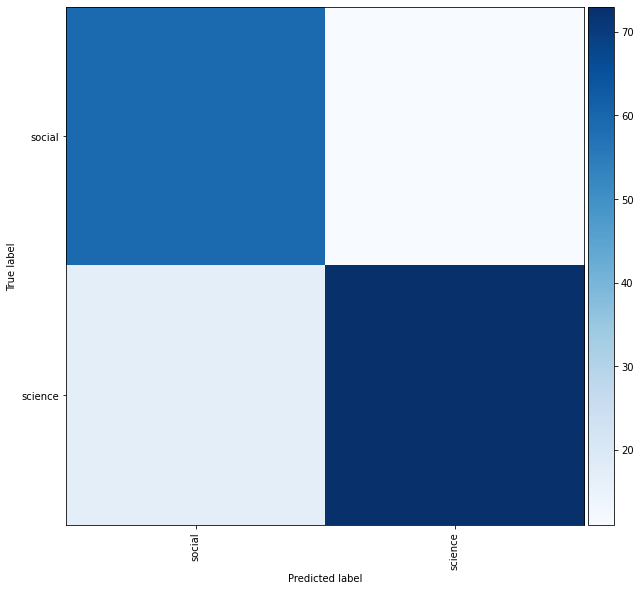

Using K-means!
K-means, n_clusters: 2, n_rounds: 15, maxrun: 100 NMI: 0.20187301259190712, Purity: 0.74375


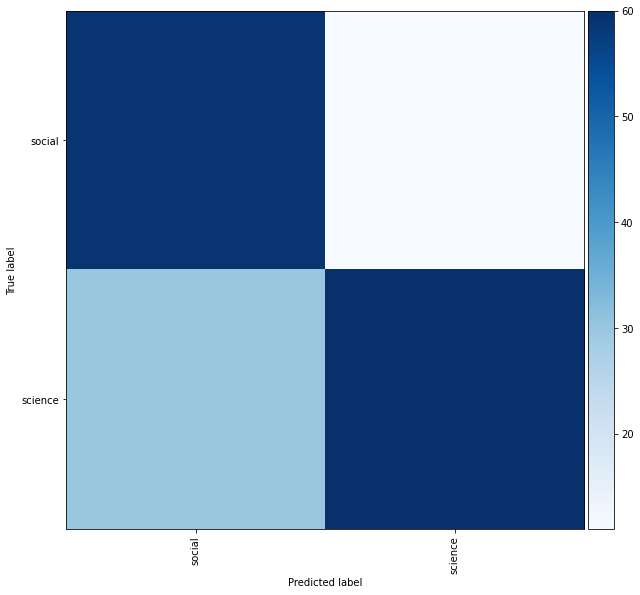

Using K-means!
K-means, n_clusters: 2, n_rounds: 15, maxrun: 200 NMI: 0.16339934281571777, Purity: 0.63125


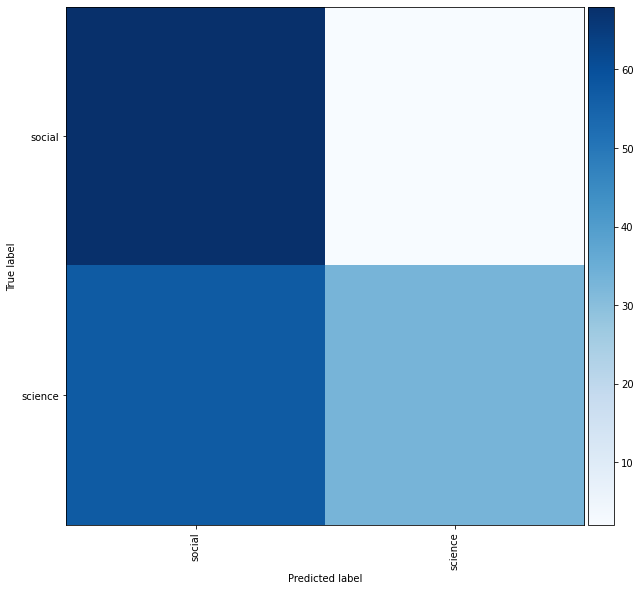

Using K-means!
K-means, n_clusters: 2, n_rounds: 15, maxrun: 300 NMI: 0.19765625947070356, Purity: 0.64375


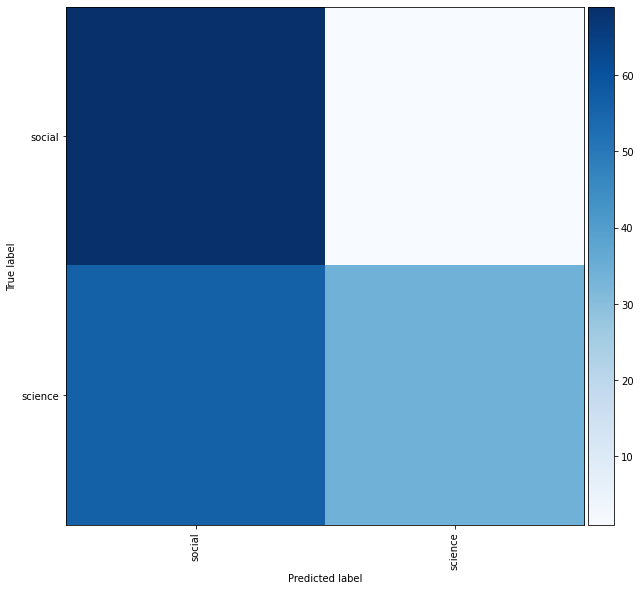

Using K-means!
K-means, n_clusters: 2, n_rounds: 15, maxrun: 400 NMI: 0.3012653669989292, Purity: 0.75


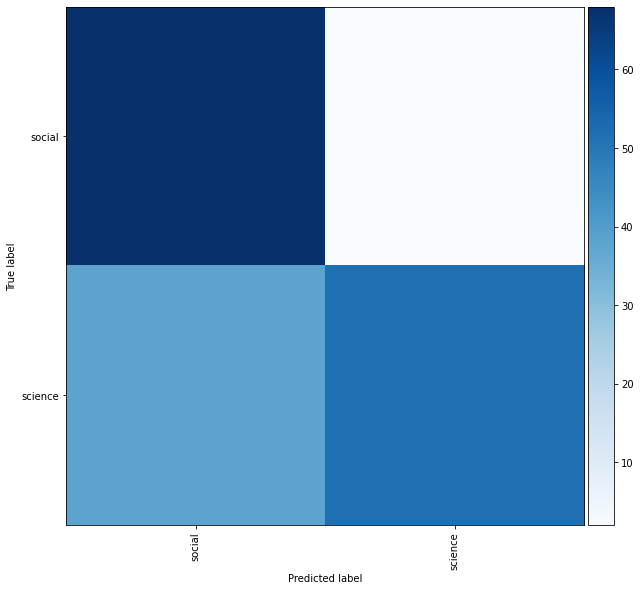

Using K-means!
K-means, n_clusters: 2, n_rounds: 15, maxrun: 500 NMI: 0.21573914095115823, Purity: 0.75


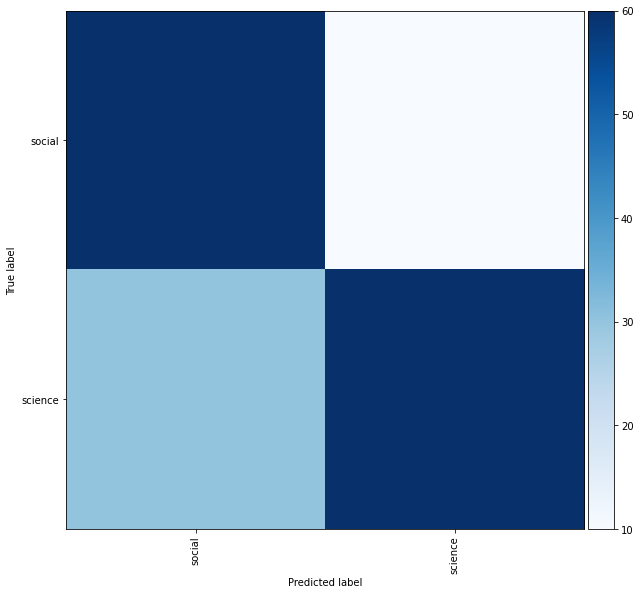

Using K-means!
K-means, n_clusters: 2, n_rounds: 20, maxrun: 100 NMI: 0.24607957393948196, Purity: 0.70625


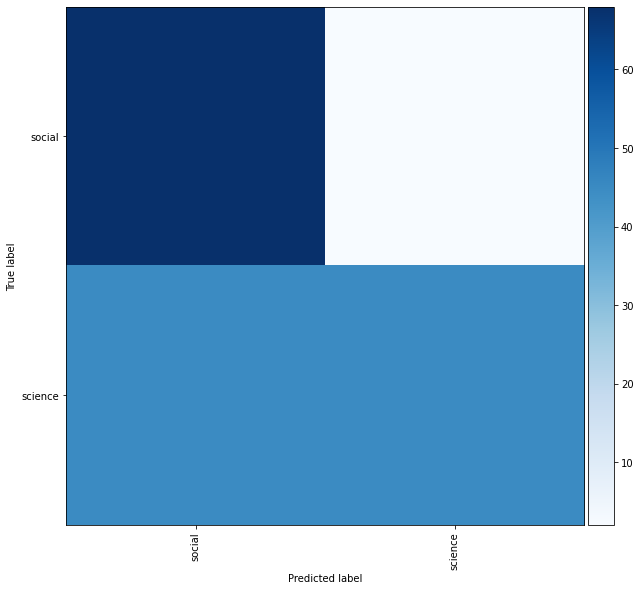

Using K-means!
K-means, n_clusters: 2, n_rounds: 20, maxrun: 200 NMI: 0.29675037762486367, Purity: 0.8


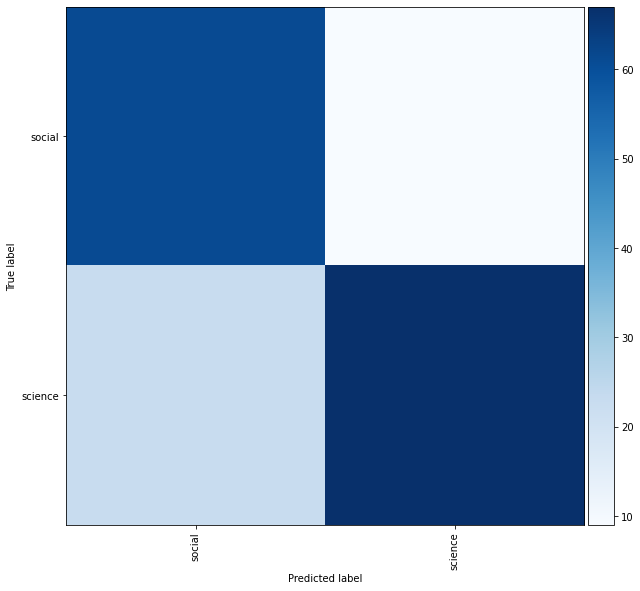

Using K-means!
K-means, n_clusters: 2, n_rounds: 20, maxrun: 300 NMI: 0.3954148756165588, Purity: 0.83125


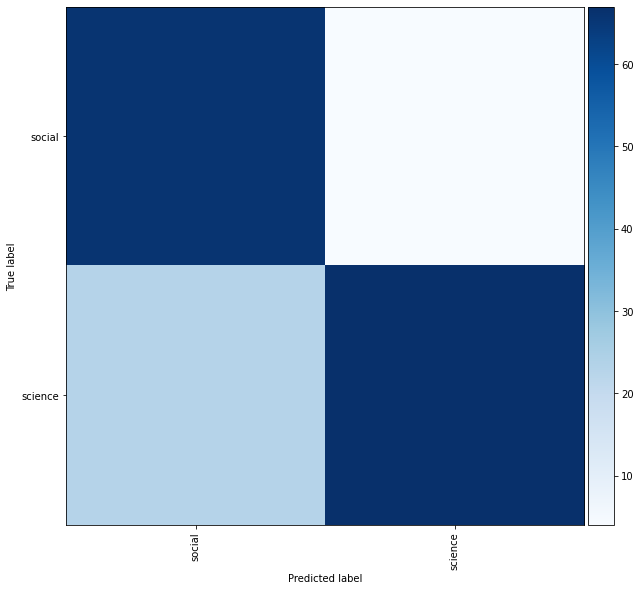

Using K-means!
K-means, n_clusters: 2, n_rounds: 20, maxrun: 400 NMI: 0.5628628139679399, Purity: 0.90625


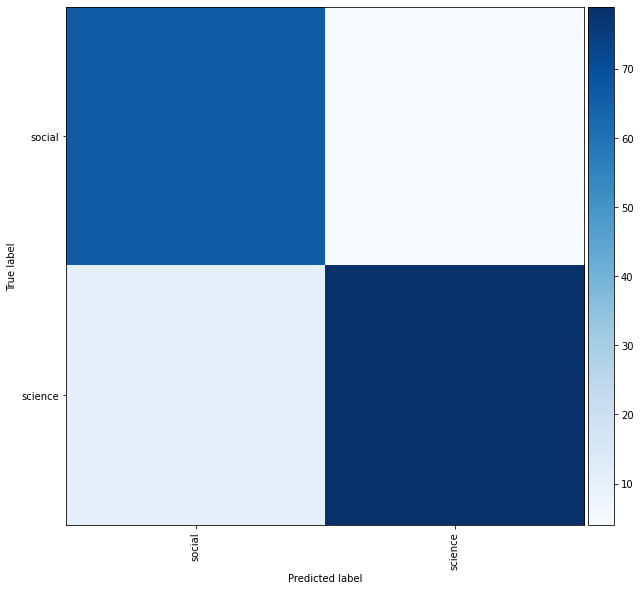

Using K-means!
K-means, n_clusters: 2, n_rounds: 20, maxrun: 500 NMI: 0.13519097434813437, Purity: 0.61875


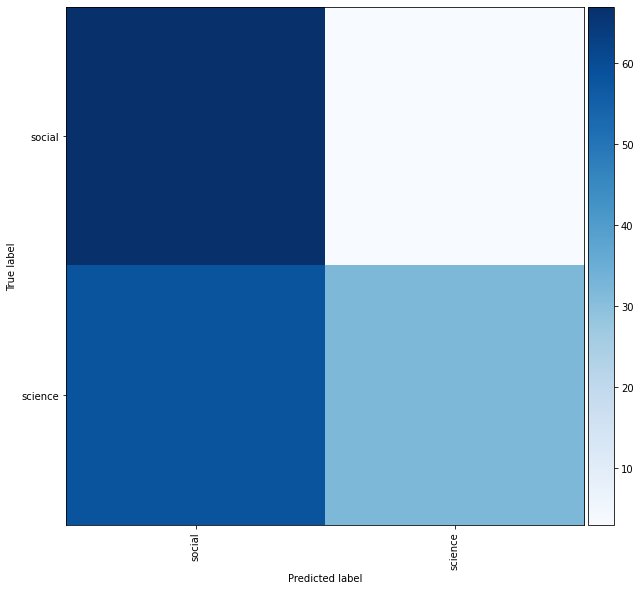

Using K-means!
K-means, n_clusters: 6, n_rounds: 5, maxrun: 100 NMI: 0.43078109505007134, Purity: 0.54375


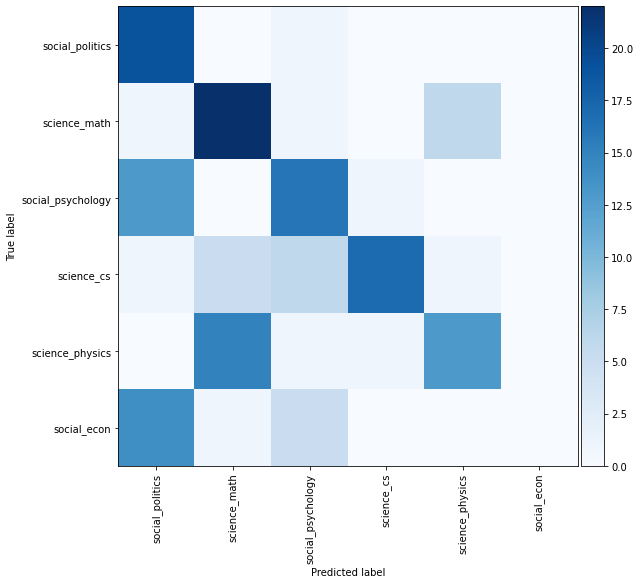

Using K-means!
K-means, n_clusters: 6, n_rounds: 5, maxrun: 200 NMI: 0.5158265015498801, Purity: 0.6125


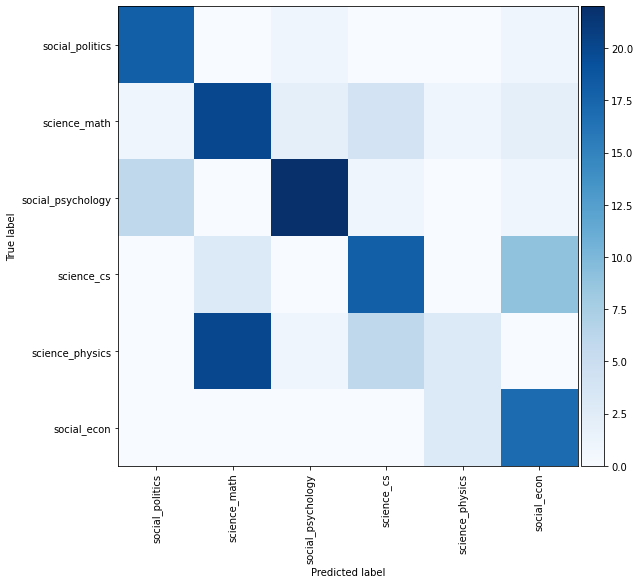

Using K-means!
K-means, n_clusters: 6, n_rounds: 5, maxrun: 300 NMI: 0.4459742285299456, Purity: 0.59375


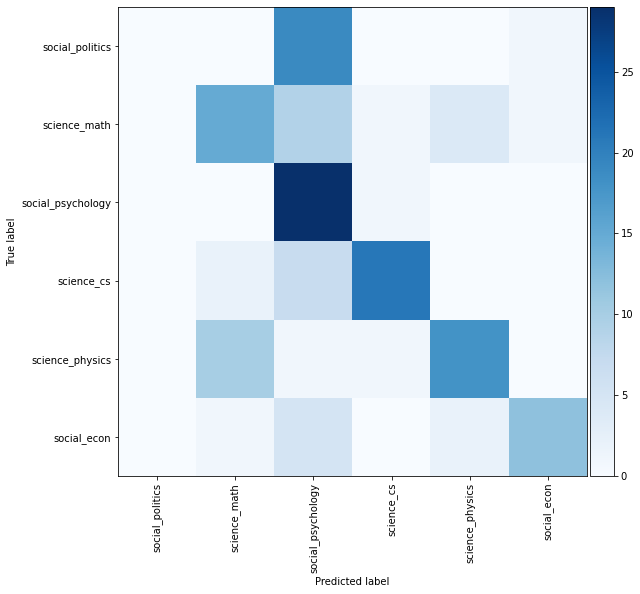

Using K-means!
K-means, n_clusters: 6, n_rounds: 5, maxrun: 400 NMI: 0.35059310890811274, Purity: 0.4875


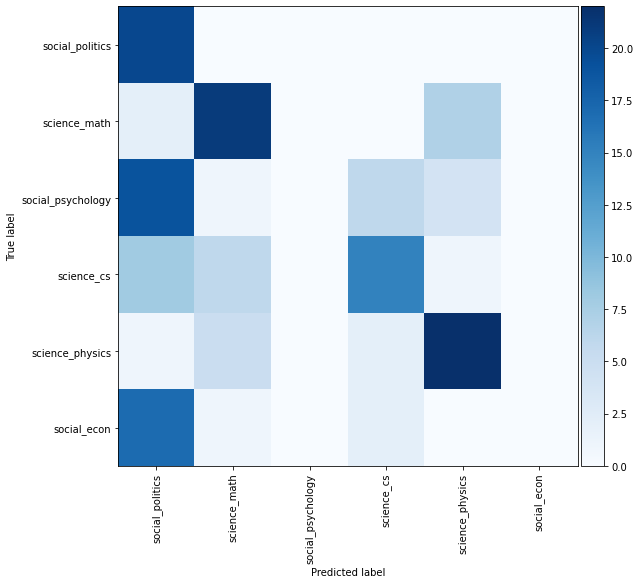

Using K-means!
K-means, n_clusters: 6, n_rounds: 5, maxrun: 500 NMI: 0.5008416299516925, Purity: 0.575


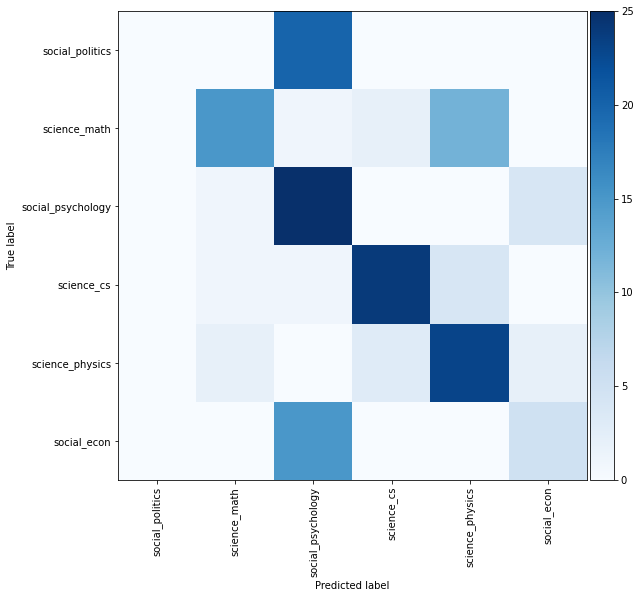

Using K-means!
K-means, n_clusters: 6, n_rounds: 10, maxrun: 100 NMI: 0.46790292340961553, Purity: 0.6


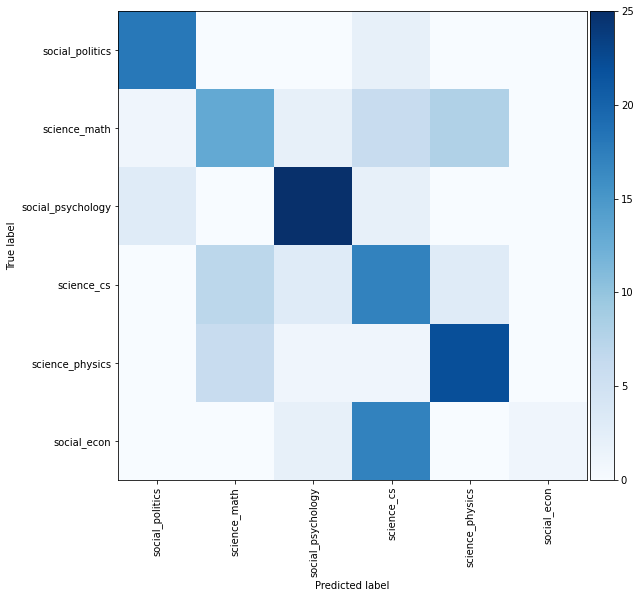

Using K-means!
K-means, n_clusters: 6, n_rounds: 10, maxrun: 200 NMI: 0.5247073897551593, Purity: 0.625


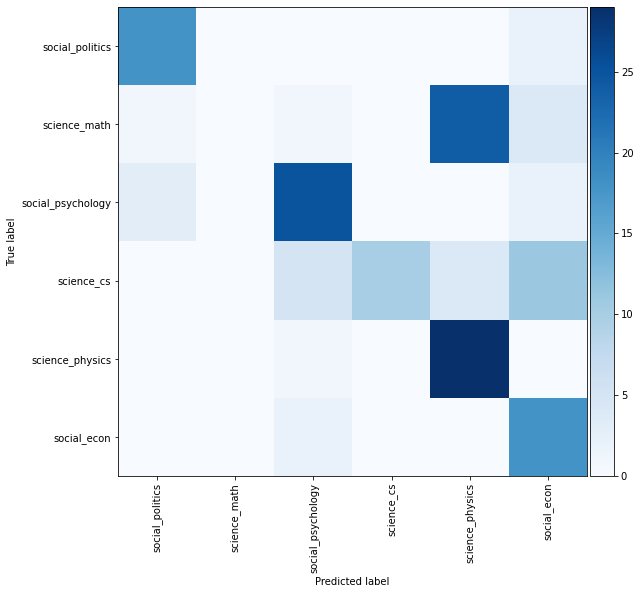

Using K-means!
K-means, n_clusters: 6, n_rounds: 10, maxrun: 300 NMI: 0.47313913446510336, Purity: 0.56875


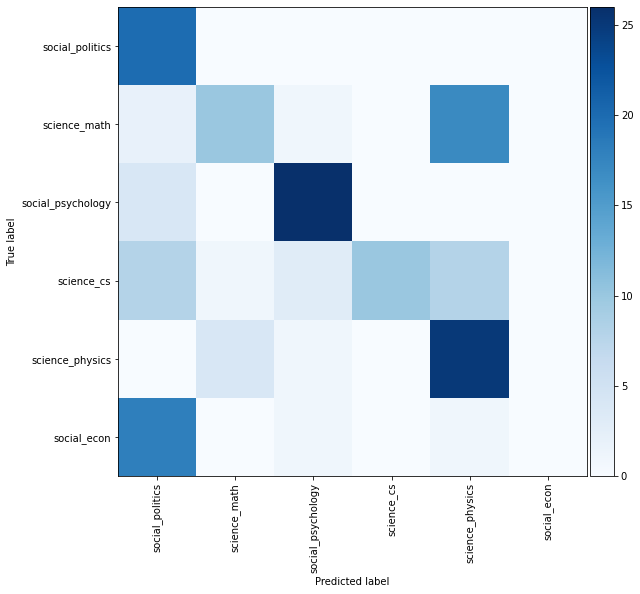

Using K-means!
K-means, n_clusters: 6, n_rounds: 10, maxrun: 400 NMI: 0.3898821814960858, Purity: 0.4625


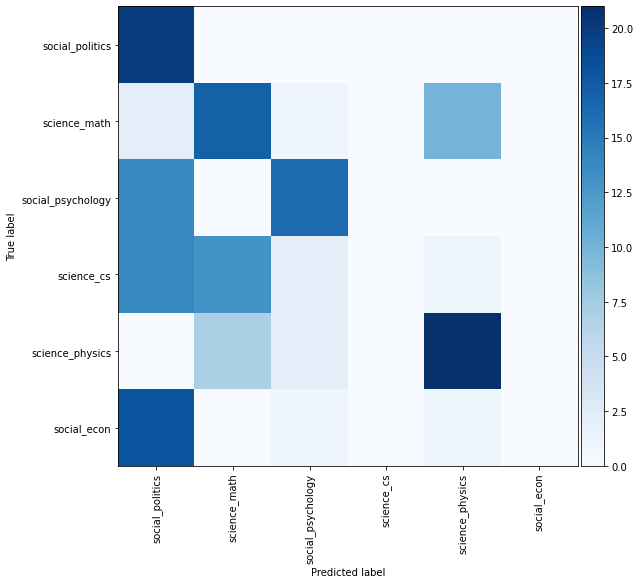

Using K-means!
K-means, n_clusters: 6, n_rounds: 10, maxrun: 500 NMI: 0.3886229785162192, Purity: 0.5375


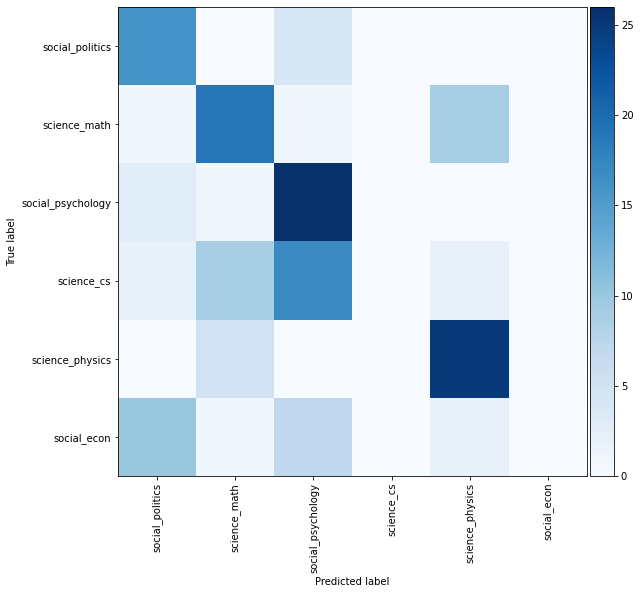

Using K-means!
K-means, n_clusters: 6, n_rounds: 15, maxrun: 100 NMI: 0.4031567209385384, Purity: 0.58125


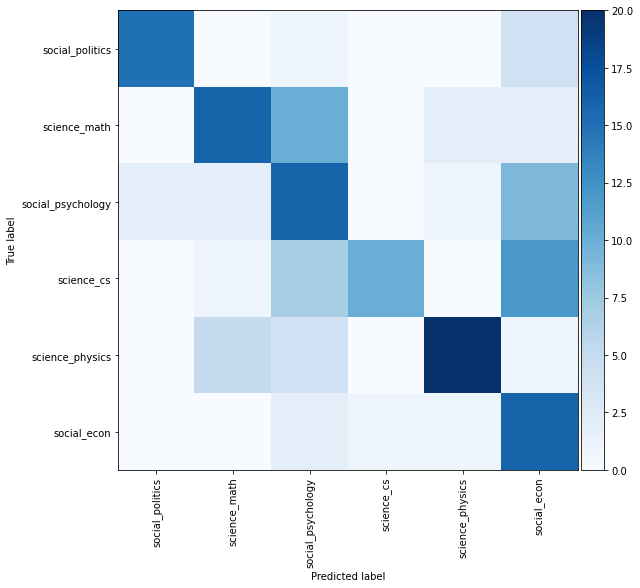

Using K-means!
K-means, n_clusters: 6, n_rounds: 15, maxrun: 200 NMI: 0.41303428369077333, Purity: 0.6375


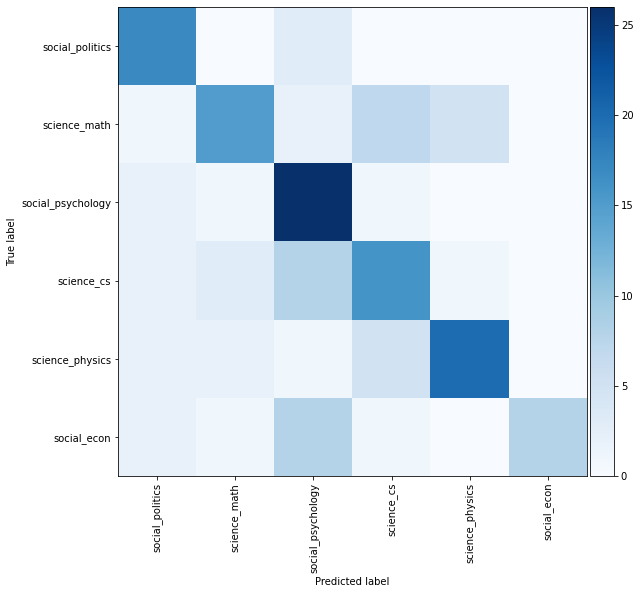

Using K-means!
K-means, n_clusters: 6, n_rounds: 15, maxrun: 300 NMI: 0.4388422136904154, Purity: 0.6375


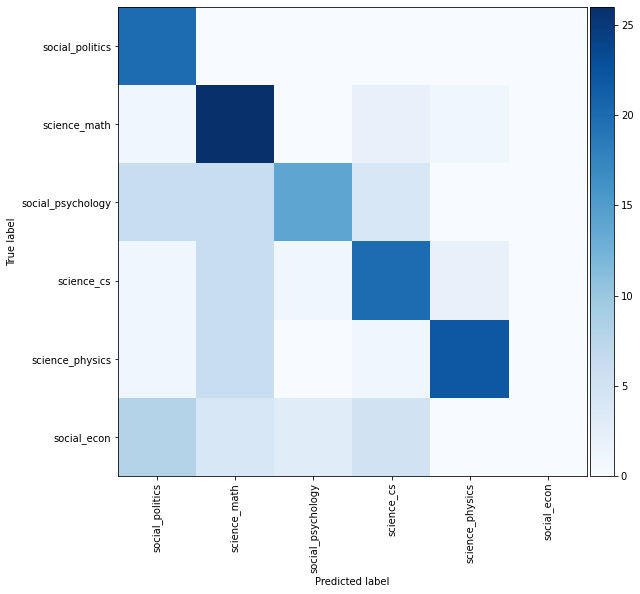

Using K-means!
K-means, n_clusters: 6, n_rounds: 15, maxrun: 400 NMI: 0.35403066310365594, Purity: 0.5375


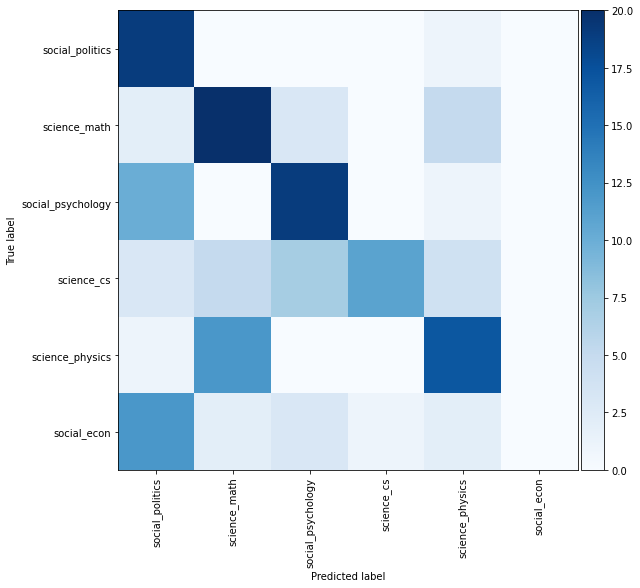

Using K-means!
K-means, n_clusters: 6, n_rounds: 15, maxrun: 500 NMI: 0.43224611624347614, Purity: 0.55


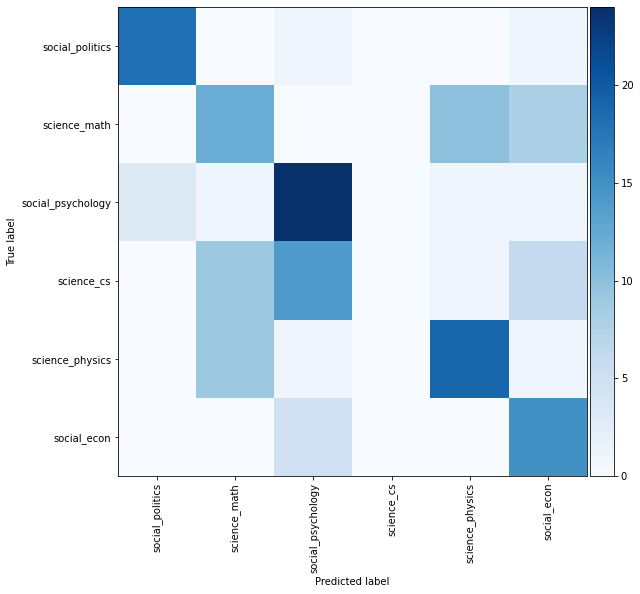

Using K-means!
K-means, n_clusters: 6, n_rounds: 20, maxrun: 100 NMI: 0.40000663281735044, Purity: 0.525


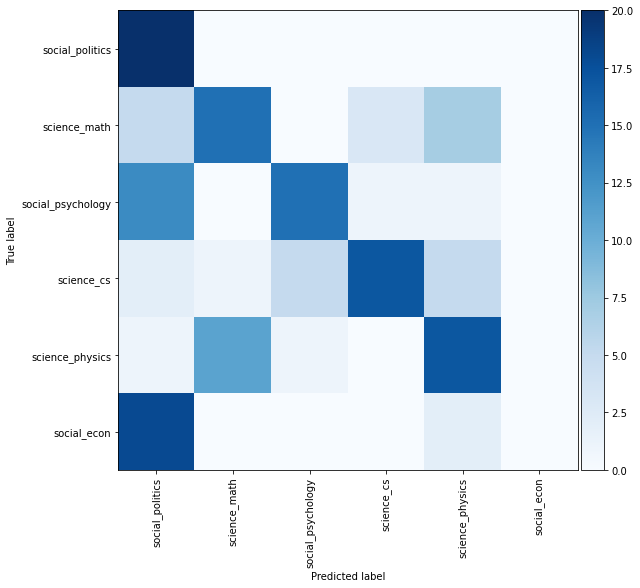

Using K-means!
K-means, n_clusters: 6, n_rounds: 20, maxrun: 200 NMI: 0.5316810369037461, Purity: 0.6625


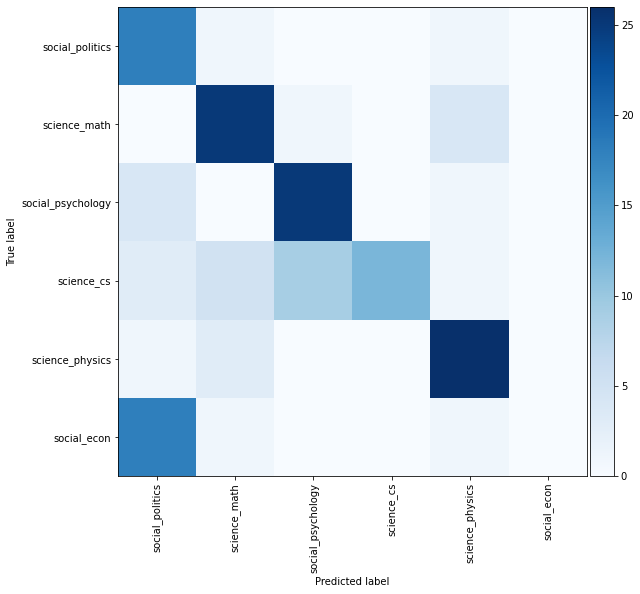

Using K-means!
K-means, n_clusters: 6, n_rounds: 20, maxrun: 300 NMI: 0.4677764860077191, Purity: 0.65


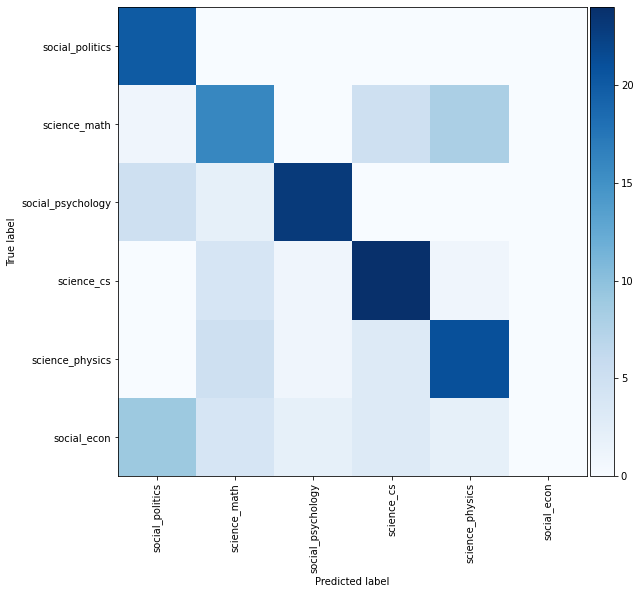

Using K-means!
K-means, n_clusters: 6, n_rounds: 20, maxrun: 400 NMI: 0.40032257094272977, Purity: 0.525


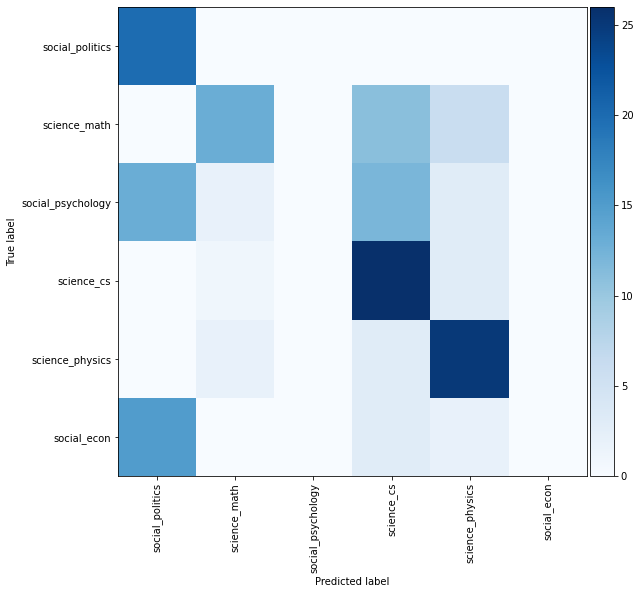

Using K-means!
K-means, n_clusters: 6, n_rounds: 20, maxrun: 500 NMI: 0.4908225860032499, Purity: 0.7


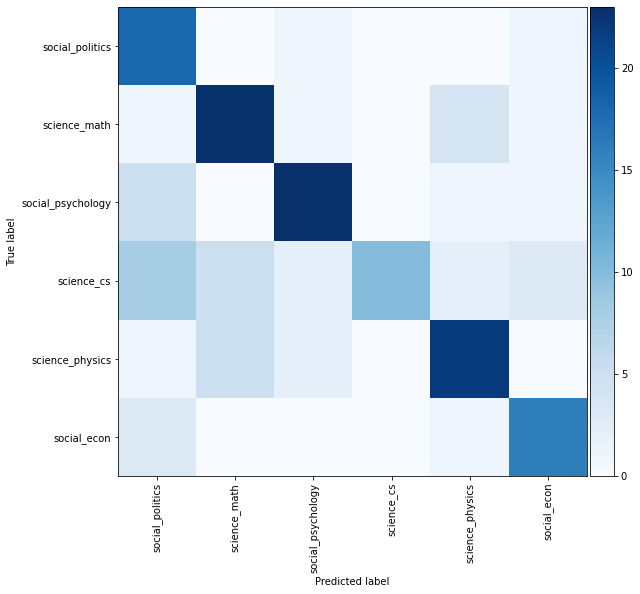

Using K-means!
K-means, n_clusters: 16, n_rounds: 5, maxrun: 100 NMI: 0.5704879383464524, Purity: 0.46875


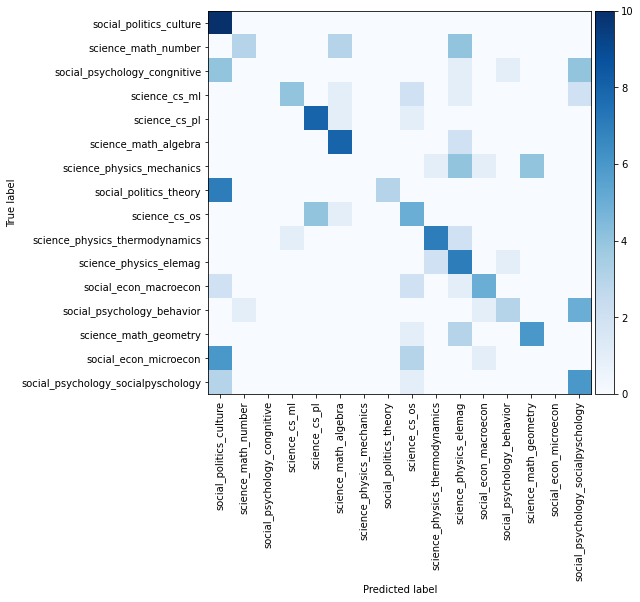

Using K-means!
K-means, n_clusters: 16, n_rounds: 5, maxrun: 200 NMI: 0.55887794620753, Purity: 0.43125


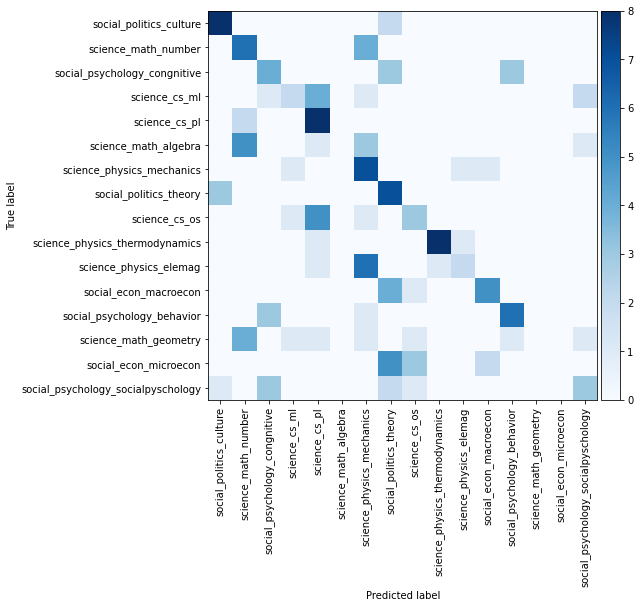

Using K-means!
K-means, n_clusters: 16, n_rounds: 5, maxrun: 300 NMI: 0.6287399719786131, Purity: 0.50625


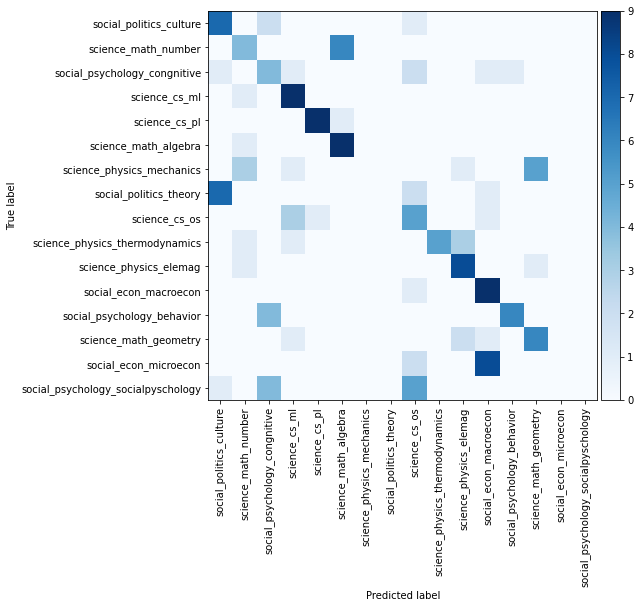

Using K-means!
K-means, n_clusters: 16, n_rounds: 5, maxrun: 400 NMI: 0.5816642022069932, Purity: 0.53125


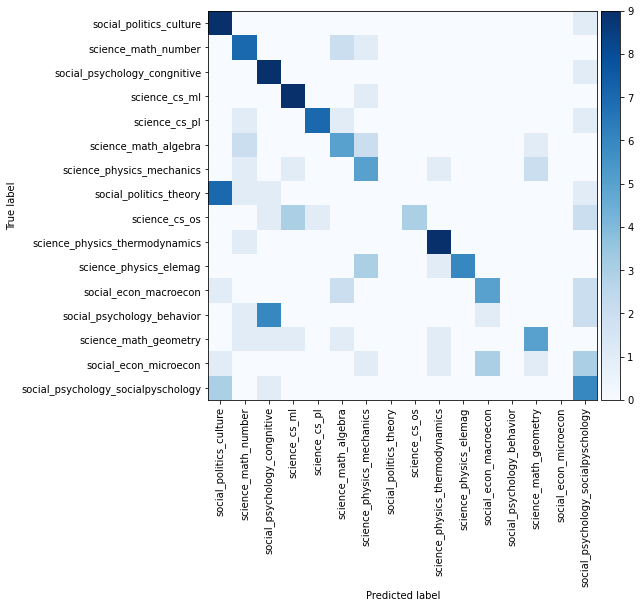

Using K-means!
K-means, n_clusters: 16, n_rounds: 5, maxrun: 500 NMI: 0.5461697313969958, Purity: 0.45


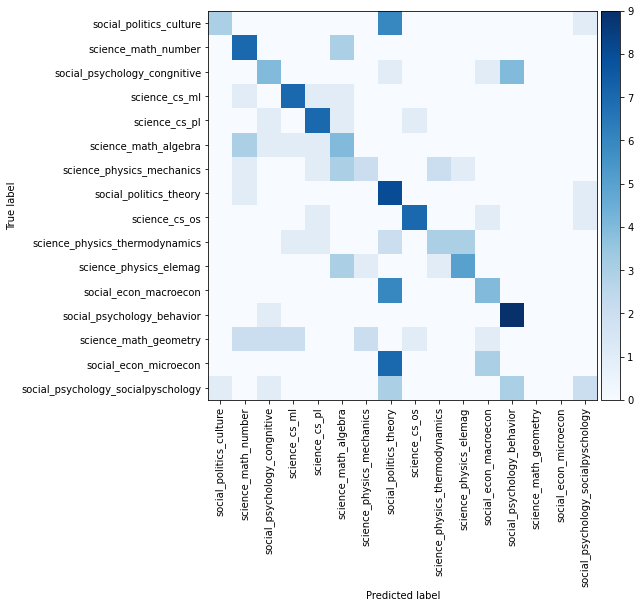

Using K-means!
K-means, n_clusters: 16, n_rounds: 10, maxrun: 100 NMI: 0.6097869142573495, Purity: 0.55


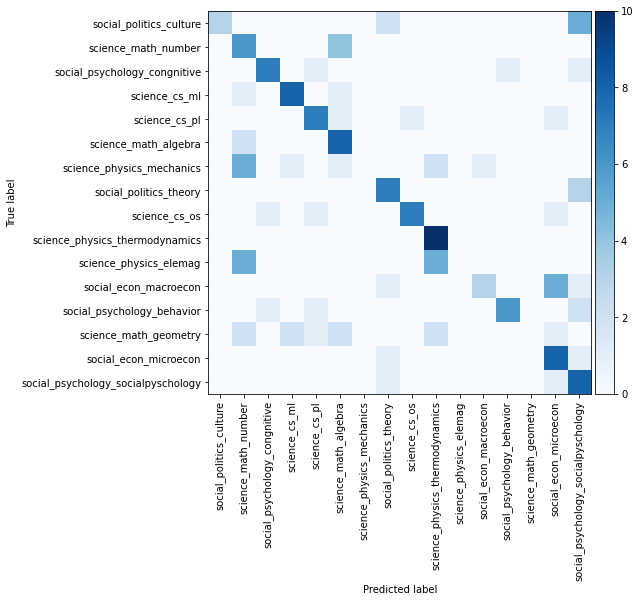

Using K-means!
K-means, n_clusters: 16, n_rounds: 10, maxrun: 200 NMI: 0.5706715813338642, Purity: 0.45


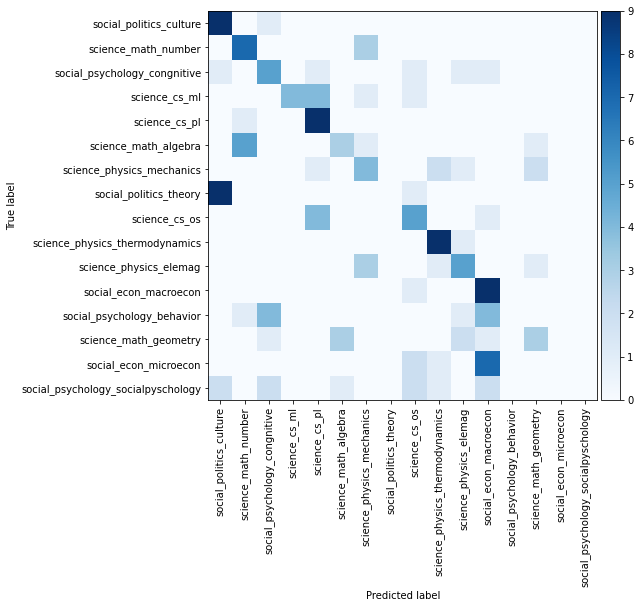

Using K-means!
K-means, n_clusters: 16, n_rounds: 10, maxrun: 300 NMI: 0.5945970512564256, Purity: 0.46875


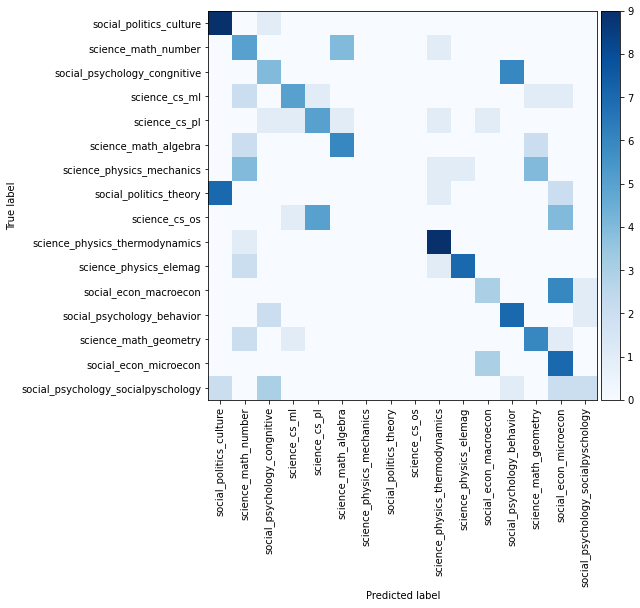

Using K-means!
K-means, n_clusters: 16, n_rounds: 10, maxrun: 400 NMI: 0.5502972381968684, Purity: 0.45625


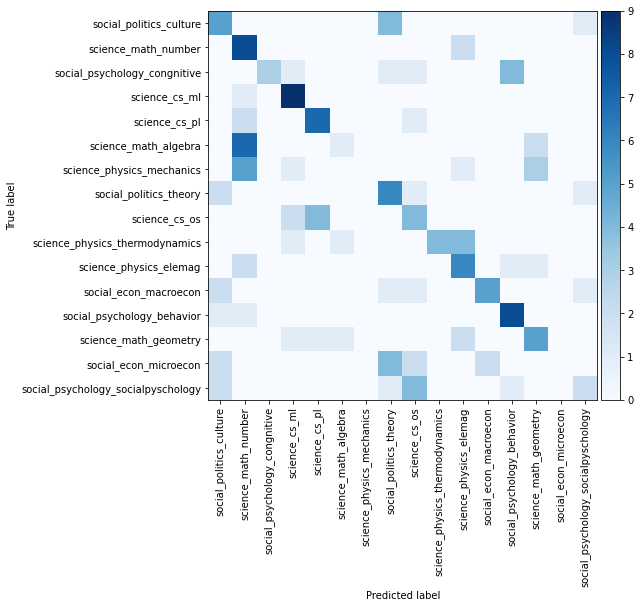

Using K-means!
K-means, n_clusters: 16, n_rounds: 10, maxrun: 500 NMI: 0.5952577847996459, Purity: 0.48125


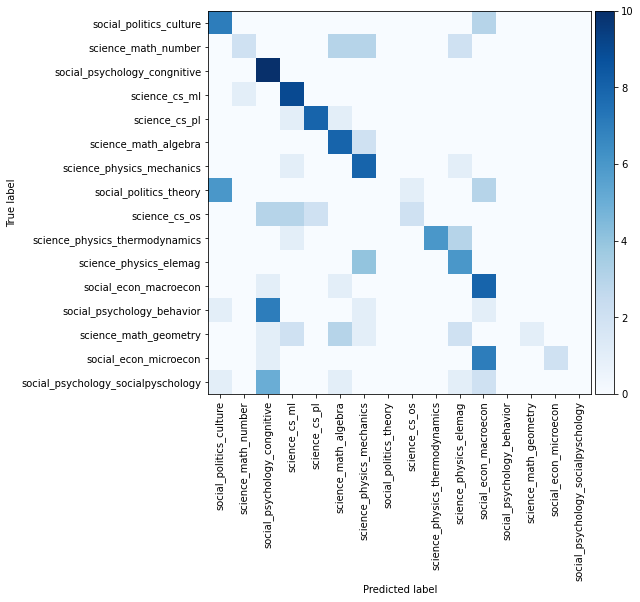

Using K-means!
K-means, n_clusters: 16, n_rounds: 15, maxrun: 100 NMI: 0.6016591739049832, Purity: 0.55


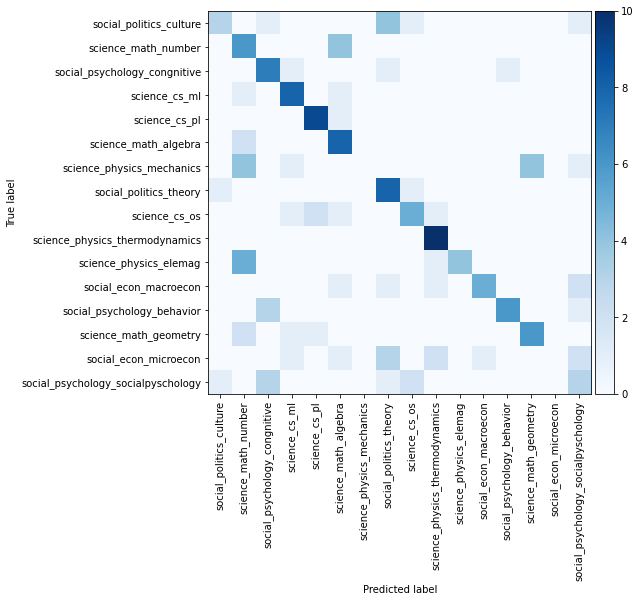

Using K-means!
K-means, n_clusters: 16, n_rounds: 15, maxrun: 200 NMI: 0.5823478380676261, Purity: 0.49375


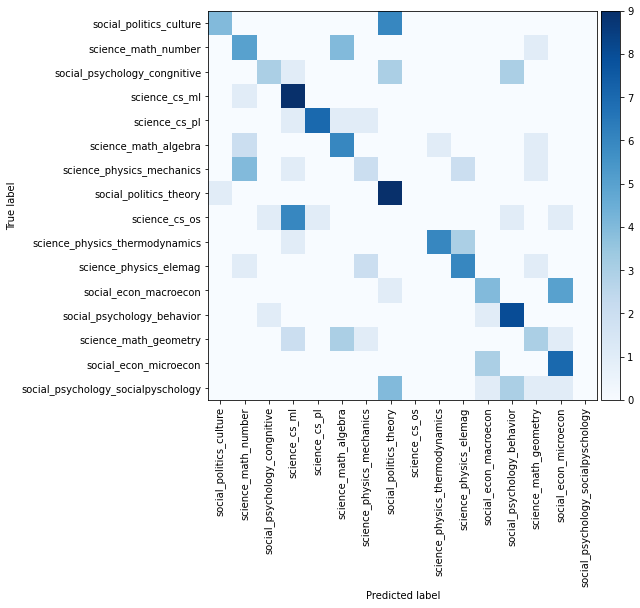

Using K-means!
K-means, n_clusters: 16, n_rounds: 15, maxrun: 300 NMI: 0.5747224036123731, Purity: 0.49375


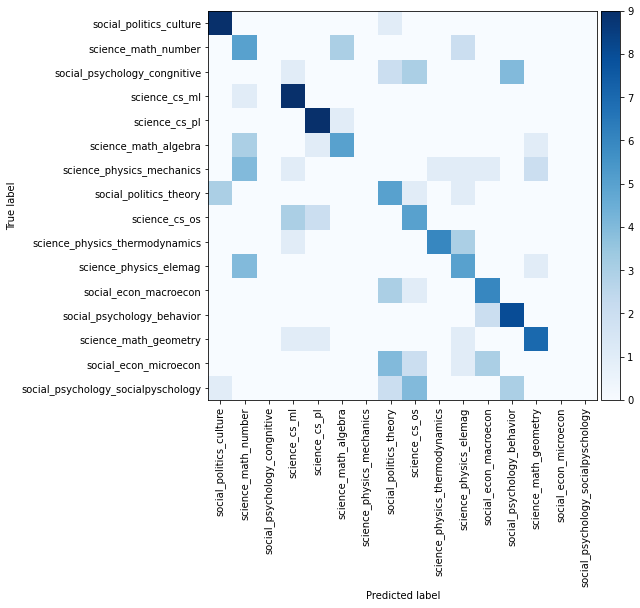

Using K-means!
K-means, n_clusters: 16, n_rounds: 15, maxrun: 400 NMI: 0.5915040353838674, Purity: 0.475


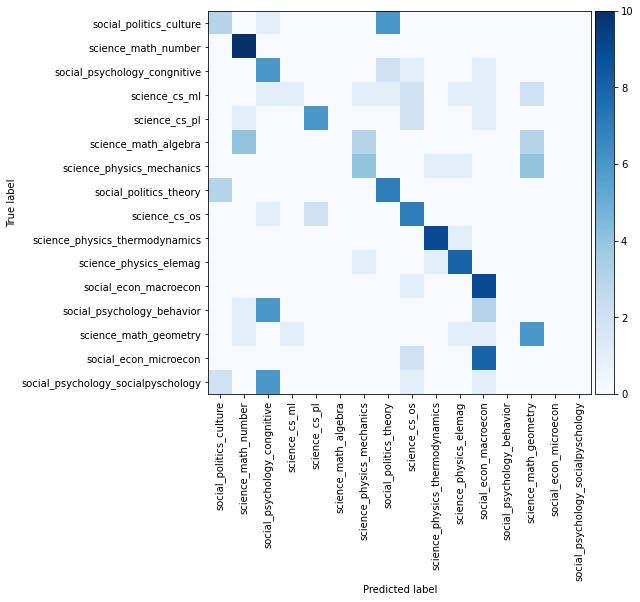

Using K-means!
K-means, n_clusters: 16, n_rounds: 15, maxrun: 500 NMI: 0.5980244370365482, Purity: 0.525


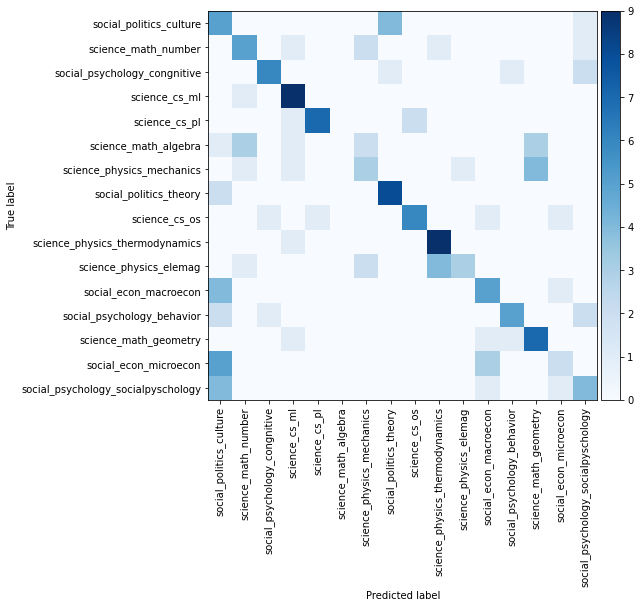

Using K-means!
K-means, n_clusters: 16, n_rounds: 20, maxrun: 100 NMI: 0.591937418979625, Purity: 0.50625


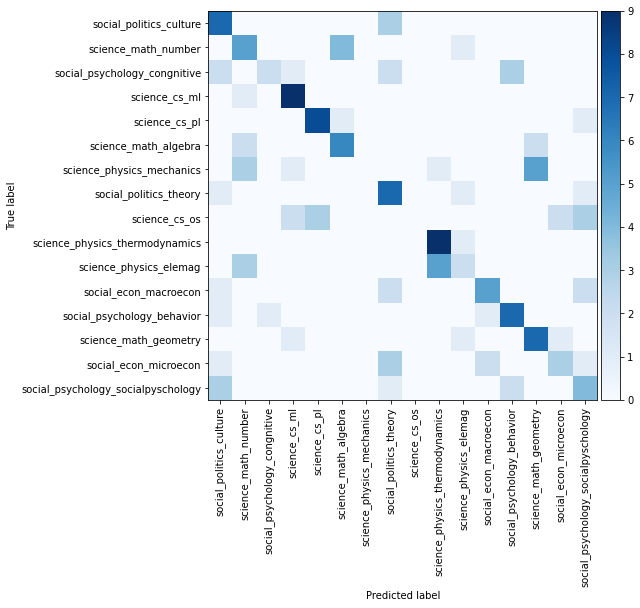

Using K-means!
K-means, n_clusters: 16, n_rounds: 20, maxrun: 200 NMI: 0.5670535268427216, Purity: 0.5


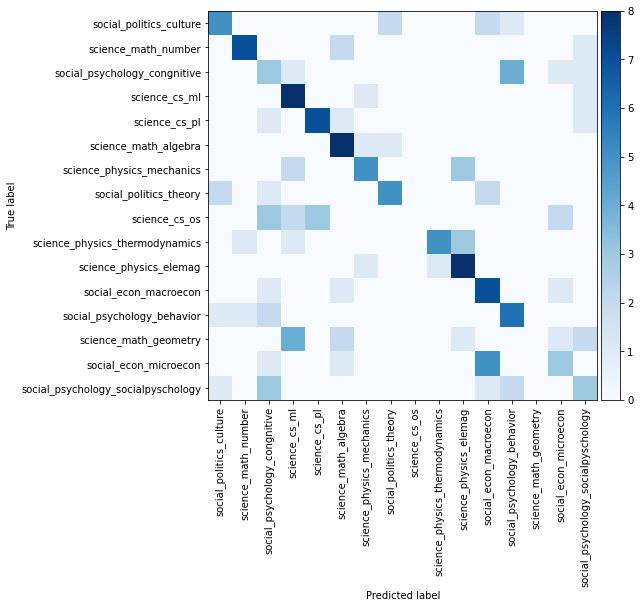

Using K-means!
K-means, n_clusters: 16, n_rounds: 20, maxrun: 300 NMI: 0.6500939787928868, Purity: 0.58125


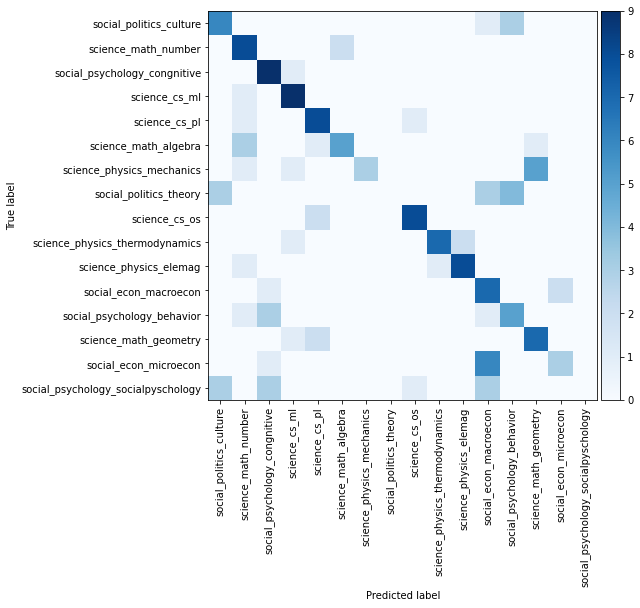

Using K-means!
K-means, n_clusters: 16, n_rounds: 20, maxrun: 400 NMI: 0.5636622783392882, Purity: 0.48125


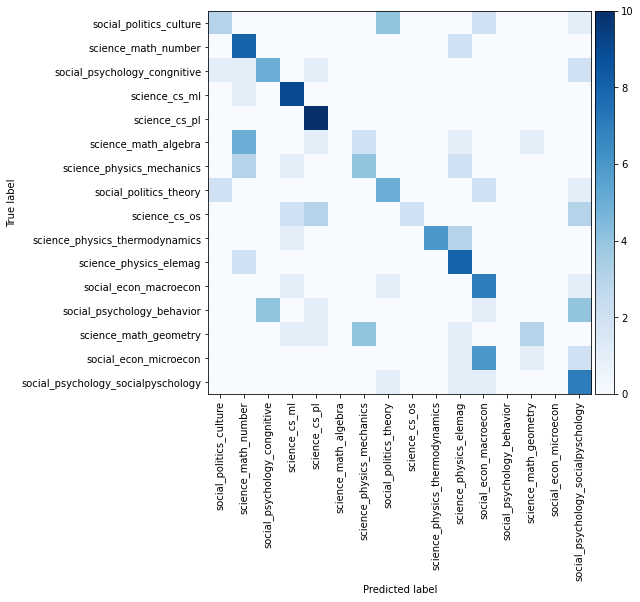

Using K-means!
K-means, n_clusters: 16, n_rounds: 20, maxrun: 500 NMI: 0.5806876287515159, Purity: 0.46875


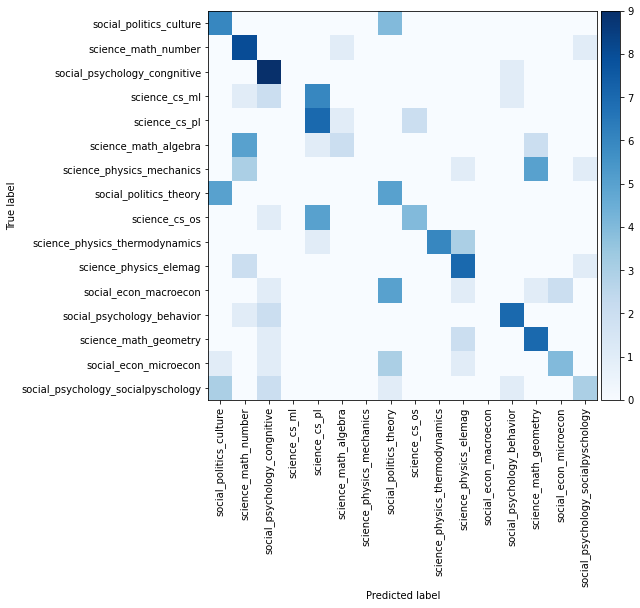

In [44]:
#nclusters 
n_level_lst = [1,2,3]
nr_list = [5,10,15,20]
maxrun_lst = [100,200,300,400,500]
pu_km_np = np.zeros([len(n_level_lst), len(nr_list),len(maxrun_lst)])
nmi_km_np = np.zeros([len(n_level_lst), len(nr_list),len(maxrun_lst)])
fs = np.load(feature_path, allow_pickle=True)[()]
for nl in range(len(n_level_lst)):
  labels, titles, cats = utils.get_label(label_path, n_level_lst[nl])
  for nr in range(len(nr_list)):
    for mr in range(len(maxrun_lst)):
      pred = kmeans_cluster(fs, len(cats), n_rounds=nr_list[nr], maxrun=maxrun_lst[mr])
      _, cm, purity = get_purity(pred, labels)
      nmi = get_nmi(pred, labels)
      pu_km_np[nl, nr,mr] = purity
      nmi_km_np[nl, nr,mr] = nmi
      plot_confusion_matrix(
          cm, cats, normalize=False, rotation=90, figsize=(3*n_level, 3*n_level)
      )
      print("K-means, n_clusters: {}, n_rounds: {}, maxrun: {} NMI: {}, Purity: {}".format(len(cats), nr_list[nr], maxrun_lst[mr], nmi, purity))
      plt.show()



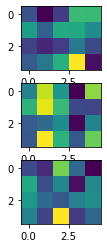

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.imshow(nmi_km_np[0,:,:])
ax2.imshow(nmi_km_np[1,:,:])
ax3.imshow(nmi_km_np[2,:,:])
plt.show()

In [51]:
nmi_km_np[0,3,3]

0.5628628139679399

In [52]:
nmi_km_np[1,3,1]

0.5316810369037461

In [60]:
nmi_km_np[1,3,4]

0.4908225860032499

In [55]:
nmi_km_np[2,3,2]

0.6500939787928868

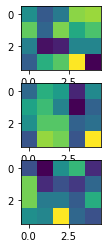

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.imshow(pu_km_np[0,:,:])
ax2.imshow(pu_km_np[1,:,:])
ax3.imshow(pu_km_np[2,:,:])
plt.show()

In [56]:
pu_km_np[0,3,3]

0.90625

In [57]:
pu_km_np[1,3,1]

0.6625

In [61]:
pu_km_np[1,3,4]

0.7

In [62]:
pu_km_np[2,3,2]

0.58125

## Answers to 3.4
The reason number of clusters was picked as 2,6,16 is because it is its natural clusters for different levels.

For agglomerative methods, generally speaking, Complete and ward method performed best among all the methods tested on all the number of clusters. 
1. When n_clusters = 2. Complete method provide model with NMI: 0.138, Purity: 0.719; 
2. when n_clusters = 16, Complete method provide model with NMI: 0.647, Purity: 0.556. 
3. However when n_clusters = 6, One method provided higher TMI value, the other method provided higher purity value. Average methods, provides TMI: 0.551, Purity: 0.494; Ward model, provide: NMI: 0.464, Purity: 0.537. 

For k means methods, different n_rounds and maxrun is assigned to find the best clustering result. This time, all the clustering results was given by n_rounds = 20, suggesting more n_rounds does provide a better clustering. 
1. For n_clusters = 2, k-mean clustering model with n_rounds = 20, max_run = 400 provide best result: TMI: 0.563, Purity: 0.906; 
2. For n_clusters = 16, k-mean clustering model with n_rounds = 20, max_run = 300 provide best result: TMI: 0.65, Purity: 0.581;
3. For n_clusters = 6, One of the model provided high TMI value and the other model provided higher purity value. k-mean clustering model with n_rounds = 20, max_run = 200 provide result: TMI: 0.532, Purity: 0.553. k-mean clustering model with n_rounds = 20, max_run = 500 provide result: TMI: 0.491, Purity: 0.7.

When clusters= 2, k means method did significantly better than agglomerative methods. When clusters = 16, k means methods did comparable with agglomerative methods. When clusters = 6, even though the average method of agglomerative methods provide the highest TMI, the overall performance is worse than that of the k means methods. Therefore k-means did slightly better than agglomerative method when clusters = 6. Given this trend, agglomerative method is catching up of K-means methods when n_clusters increased.



## Answers to 3.5:
Advantage of agglomerative methods: The performance is more consistent.

Disadvantage of agglomerative methods: Did extremely poor when number of clusters is small. Since there are all kinds of ways to seperate out the data.

Advantage of k_means methods: Performed well no matter n_clusters is high or low.

Disadvantage of k_means methods: resutl is not consistent, highly depends on hyperparameters.

# Part 2: MNIST Clustering

Data path is: ./data/noisy_distribute.mat


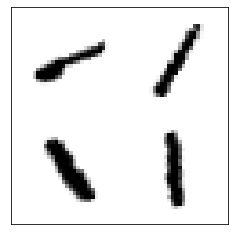

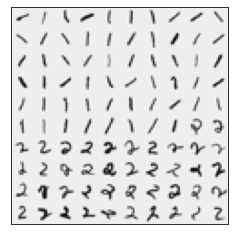

In [63]:
np.random.seed(1)


datapath="./data/noisy_distribute.mat"
print("Data path is: %s" % datapath)

trainData,devData,testData=read_mnist(datapath)
test_x_sample = testData
test_x_image = np.reshape(
    test_x_sample, [test_x_sample.shape[0],28,28]).transpose(0, 2, 1)
train_x_sample = trainData.images
train_x_image = np.reshape(
    train_x_sample, [train_x_sample.shape[0],28,28]).transpose(0, 2, 1)
train_y_sample = np.reshape(trainData.labels, [train_x_sample.shape[0]])
dev_x_sample = devData.images
dev_x_image = np.reshape(
    dev_x_sample, [dev_x_sample.shape[0],28,28]).transpose(0, 2, 1)
dev_y_sample = np.reshape(devData.labels, [dev_x_sample.shape[0]])


"""
1. Visualize a few input digits
plot_images: Plot a list of selected digits
"""
plot_images(train_x_image[::1500], 2, 2, 28, 28)


"""
2. Visualize more input digits, using smaller scale
"""

train_x_rescale = resize(train_x_image,10,10)
ax = plot_images(train_x_rescale[::100], 10, 10, 10, 10)
plt.show()


In [64]:
train_y_sample[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

## Answers to 4.1
Same as previous

##Answers to 4.2
Same as previous

## 4.3

Using hierarchical clustering!
complete on 100 samples, NMI: 0.400, Purity: 0.390
Using hierarchical clustering!
average on 100 samples, NMI: 0.350, Purity: 0.340
Using hierarchical clustering!
ward on 100 samples, NMI: 0.375, Purity: 0.360
Using hierarchical clustering!
complete on 500 samples, NMI: 0.214, Purity: 0.304
Using hierarchical clustering!
average on 500 samples, NMI: 0.220, Purity: 0.240
Using hierarchical clustering!
ward on 500 samples, NMI: 0.404, Purity: 0.446
Using hierarchical clustering!
complete on 1000 samples, NMI: 0.259, Purity: 0.313
Using hierarchical clustering!
average on 1000 samples, NMI: 0.229, Purity: 0.236
Using hierarchical clustering!
ward on 1000 samples, NMI: 0.391, Purity: 0.431
Using hierarchical clustering!
complete on 2000 samples, NMI: 0.238, Purity: 0.325
Using hierarchical clustering!
average on 2000 samples, NMI: 0.183, Purity: 0.194
Using hierarchical clustering!
ward on 2000 samples, NMI: 0.350, Purity: 0.398


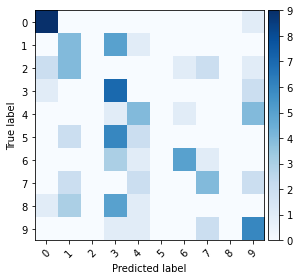

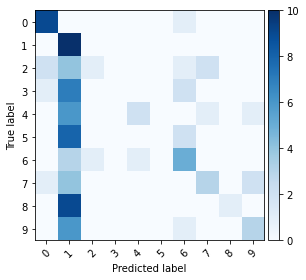

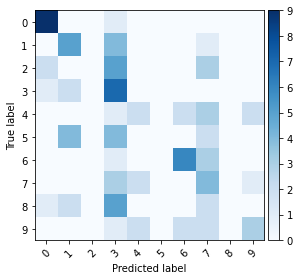

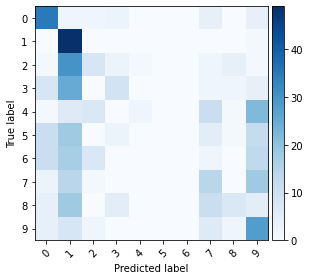

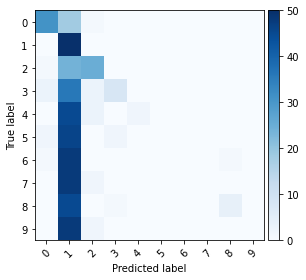

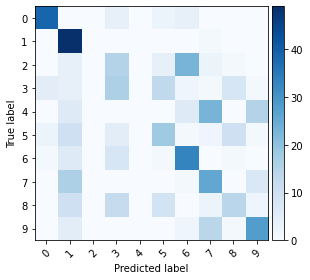

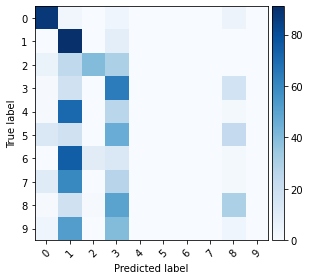

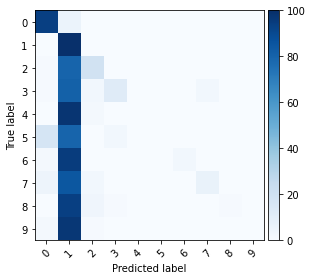

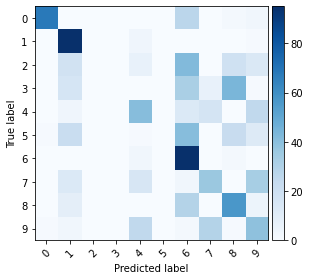

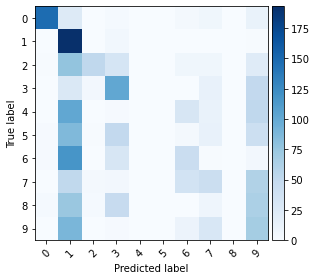

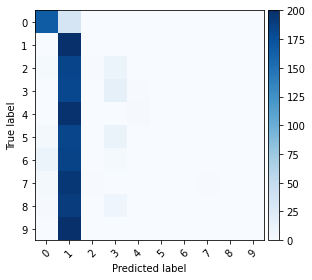

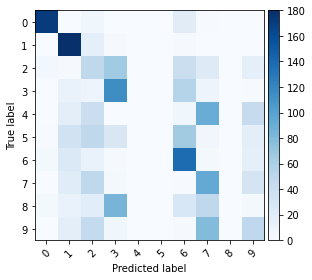

In [74]:
"""
3. Hierarchical clustering
Note: n_hier_samples is number of samples for hierarchical clustering. 
Setting it to 10000 is equivalent to using whole tuning set. 
If you want to display dendrogram, set n_hier_samples <= 150, 
      otherwise plot will be crowded.
"""

n_hier_samples_lst = [100,500,1000,2000]


hier_method_lst = ["complete","average","ward"]
nmi_np = np.zeros([len(n_hier_samples_lst),len(hier_method_lst)])
purity_np = np.zeros([len(n_hier_samples_lst),len(hier_method_lst)])
for sa in range(len(n_hier_samples_lst)):
  idx = sample_index(dev_y_sample, n_hier_samples_lst[sa])
  dev_x_sample_hier = dev_x_sample[idx]
  dev_y_sample_hier = dev_y_sample[idx]
  for hm in range(len(hier_method_lst)):
    ward_hier, pred = hierarchical_cluster(
        dev_x_sample_hier, n_clusters=10, method=hier_method_lst[hm]
    )
    nmi = get_nmi(pred, dev_y_sample_hier)
    _, cm, purity = get_purity(pred, dev_y_sample_hier)
    nmi_np[sa,hm] = nmi
    purity_np[sa,hm] = purity
    plot_confusion_matrix(cm, range(10), normalize=False)
    print(
        "%s on %d samples, NMI: %.3f, Purity: %.3f" % (
            hier_method_lst[hm], n_hier_samples_lst[sa], nmi, purity)
    )

#plot_dendrogram(ward_hier, dev_y_sample_hier)

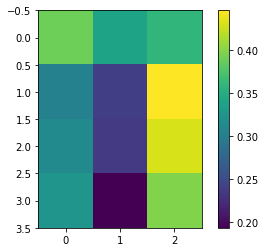

In [75]:
#purity plot
plt.imshow(purity_np)
plt.colorbar()
plt.show()

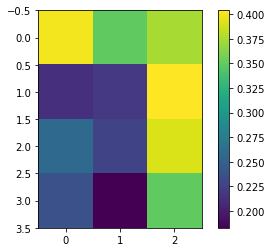

In [76]:
#nmi plot
plt.imshow(nmi_np)
plt.colorbar()
plt.show()

Using K-means!
K-means, 100 maxrun, 100 samples, NMI: 0.374, Purity: 0.400
Using K-means!
K-means, 200 maxrun, 100 samples, NMI: 0.413, Purity: 0.440
Using K-means!
K-means, 300 maxrun, 100 samples, NMI: 0.376, Purity: 0.400
Using K-means!
K-means, 400 maxrun, 100 samples, NMI: 0.397, Purity: 0.440
Using K-means!
K-means, 500 maxrun, 100 samples, NMI: 0.417, Purity: 0.440
Using K-means!
K-means, 1000 maxrun, 100 samples, NMI: 0.397, Purity: 0.420
Using K-means!
K-means, 2000 maxrun, 100 samples, NMI: 0.347, Purity: 0.410
Using K-means!
K-means, 100 maxrun, 500 samples, NMI: 0.393, Purity: 0.428
Using K-means!
K-means, 200 maxrun, 500 samples, NMI: 0.362, Purity: 0.418
Using K-means!
K-means, 300 maxrun, 500 samples, NMI: 0.384, Purity: 0.436
Using K-means!
K-means, 400 maxrun, 500 samples, NMI: 0.356, Purity: 0.402
Using K-means!
K-means, 500 maxrun, 500 samples, NMI: 0.388, Purity: 0.440
Using K-means!
K-means, 1000 maxrun, 500 samples, NMI: 0.370, Purity: 0.412
Using K-means!
K-means

/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 2000 maxrun, 1000 samples, NMI: 0.321, Purity: 0.411
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 100 maxrun, 2000 samples, NMI: 0.333, Purity: 0.426
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 200 maxrun, 2000 samples, NMI: 0.329, Purity: 0.423
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 300 maxrun, 2000 samples, NMI: 0.327, Purity: 0.425
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 400 maxrun, 2000 samples, NMI: 0.337, Purity: 0.434
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 500 maxrun, 2000 samples, NMI: 0.326, Purity: 0.428
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 1000 maxrun, 2000 samples, NMI: 0.328, Purity: 0.428
Using K-means!


/content/plot.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


K-means, 2000 maxrun, 2000 samples, NMI: 0.326, Purity: 0.423


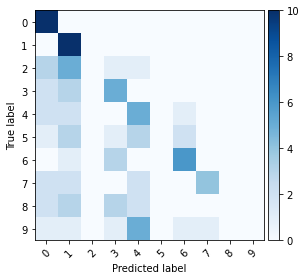

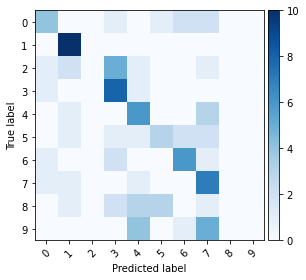

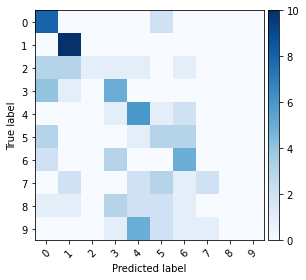

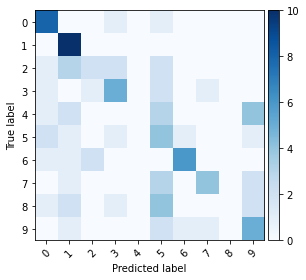

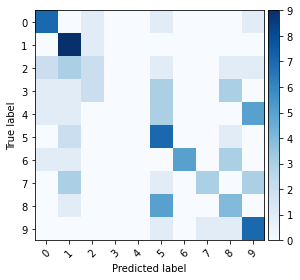

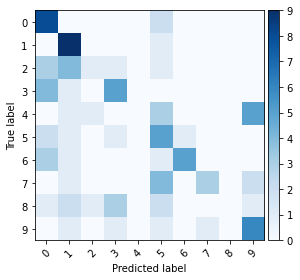

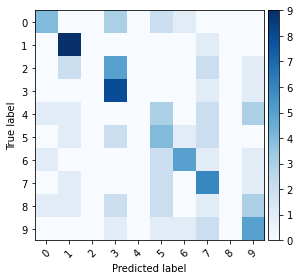

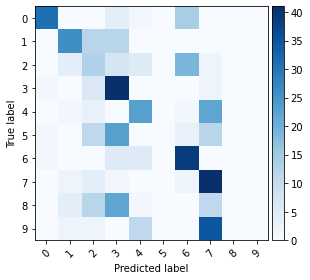

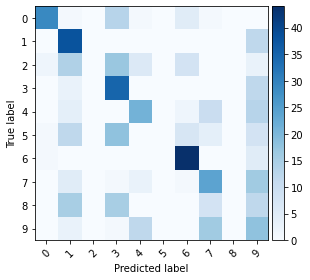

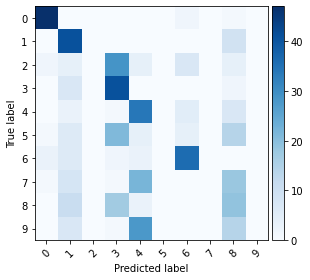

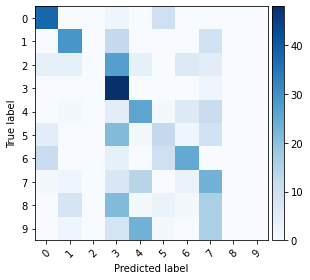

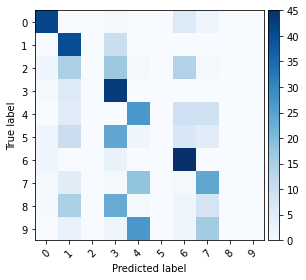

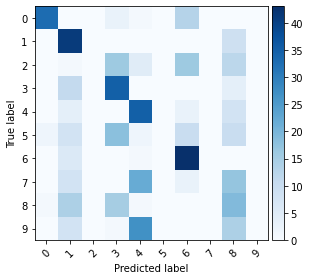

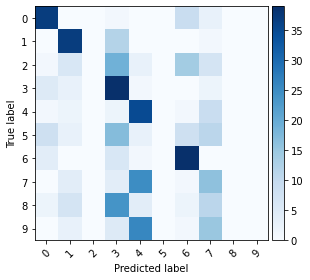

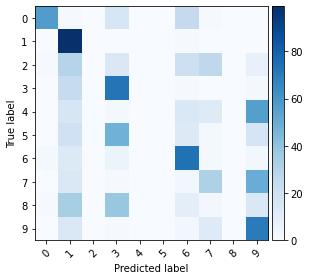

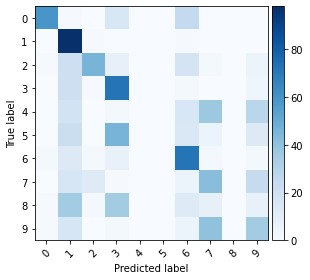

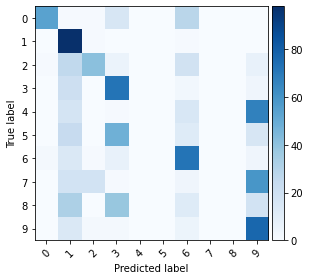

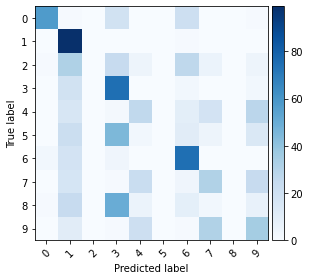

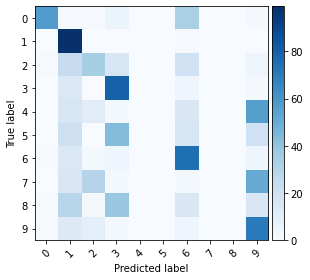

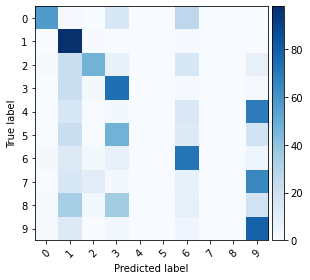

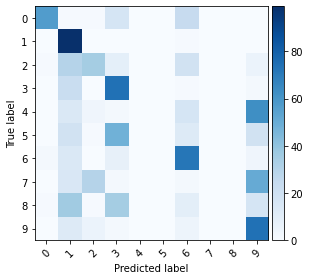

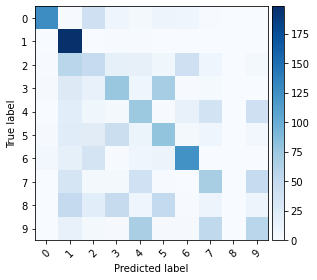

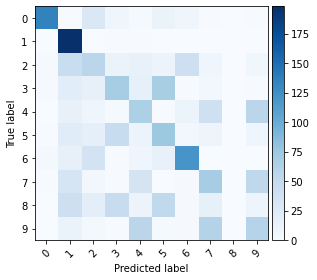

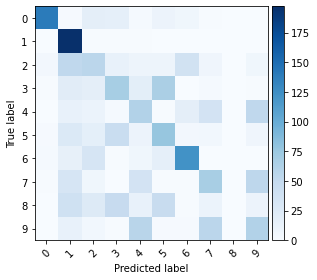

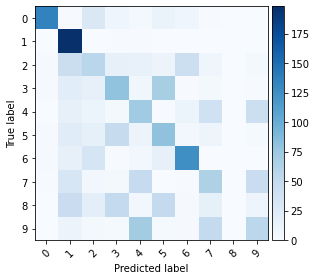

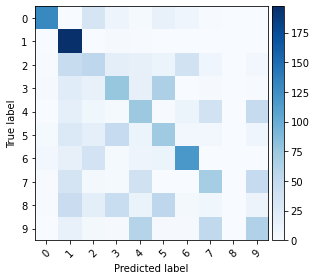

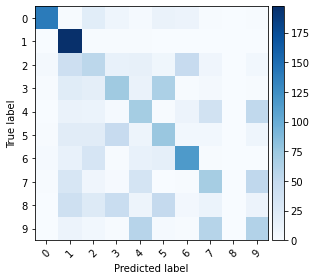

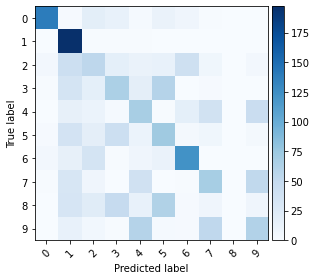

In [82]:
"""
4. Flat clustering
"""
n_hier_samples_lst = [100,500,1000,2000]
maxrun_lst = [100,200,300,400,500,1000,2000]
nmi_km_np = np.zeros([len(n_hier_samples_lst),len(maxrun_lst)])
purity_km_np = np.zeros([len(n_hier_samples_lst), len(maxrun_lst)])
for sa in range(len(n_hier_samples_lst)):
  idx = sample_index(dev_y_sample, n_hier_samples_lst[sa])
  dev_x_sample_hier = dev_x_sample[idx]
  dev_y_sample_hier = dev_y_sample[idx]
  for mr in range(len(maxrun_lst)):
    pred = kmeans_cluster(dev_x_sample_hier, n_clusters=10, n_rounds=20, maxrun=maxrun_lst[mr])
    nmi = get_nmi(pred, dev_y_sample_hier)
    _, cm, purity = get_purity(pred, dev_y_sample_hier)
    nmi_km_np[sa,mr] = nmi
    purity_km_np[sa,mr ] = purity
    plot_confusion_matrix(cm, range(10), normalize=False)
    print("K-means, %d maxrun, %d samples, NMI: %.3f, Purity: %.3f" % (maxrun_lst[mr], n_hier_samples_lst[sa] , nmi, purity))

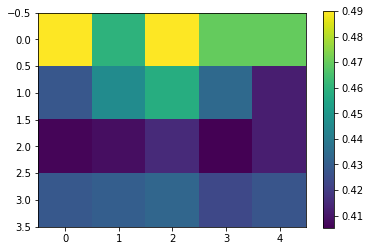

In [80]:
#purity plot
plt.imshow(purity_km_np)
plt.colorbar()
plt.show()

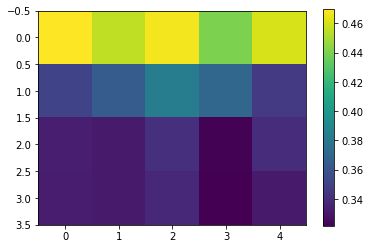

In [81]:
#nmi plot
plt.imshow(nmi_km_np)
plt.colorbar()
plt.show()

## Answers to 4.5
All the clustering methods was trained on different training samples: [100,500,1000,2000]. 

For agglomerative methods, it was tuned on three different methods ["complete","average","ward"]. For agglomerative methods, the complete and average and ward method performed similarly when training sample is small, however, ward method performed significantly better when training sample is large. When training sample is 2000, complete method produce NMI: 0.238, Purity: 0.325; Average method produce: NMI: 0.183, Purity: 0.194 and Ward method produce NMI: 0.350, Purity: 0.398

For k means, hypeerparameter n_rounds is set as 20 but hyperparameter maxrun steps is tuned. As training sample increased, the performance decreased. When training sample is samll, different maxrun steps would fluctuate the accuracy. As training samples increased, maxrun steps has less influence on the performance of kmeans. when training samples is 2000, NMI is  0.338, purity is 0.433.

This result does match my expectation as increase number of samples would deteriorate the performance of the clustering method. Ward method for agglomerative clustering method performed best when number of samples increased as WARD method has less influence on clusters sizes. Maxrun steps less influenced the performance when training samples increasd also matched my expectation. Increased in training samples result Less of chance of premature finish of k-means

I think both methods are equally useful and have comparable performance. 

In [83]:
"""
5. Generate submission
Gather dev and test, then do clustering on the combined set. 
Using tuning set is to get matching from cluster index to ground-truth label.
"""
pred = kmeans_cluster(
    np.concatenate((dev_x_sample, test_x_sample), 0), n_clusters=10, n_rounds=20
)
gen_solution(
    pred[len(dev_x_sample):], pred[:len(dev_x_sample)], 
    dev_y_sample, 'submission.csv'
)

Using K-means!


In [84]:
"""
6. Download and submit your prediction.
"""
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>